# Analyse de données des interviews ministerielles sous les gouvernements Sarkozy et Hollande (LDA, JS divergence, etc.)

### Importation du csv contenant toutes les interviews

In [1]:
import pandas as pd
df_vie_publique = pd.read_csv('/Users/chloe/docs_Jupyter/code_memoire/csv_vie_publique.csv')

### Supprimer les définitions de mots involontairement scrappées

In [2]:
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Ensemble des services de l'État (administration centrale et services déconcentrés) placés sous la responsabilité d'un ministre de l'Europe et des affaires étrangères", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Organe collégial composé du Premier ministre, des ministres et des secrétaires d'État, chargé de l'exécution des lois et de la direction de la politique nationale", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Acte par lequel le Chef de l'État met fin par anticipation au mandat de l'ensemble des membres d'une assemblée parlementaire (en France, seule l'Assemblée nationale peut être dissoute)", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Organe collégial exerçant le pouvoir législatif (adoption des lois et #contrôle du pouvoir exécutif) composé de deux chambres : l'Assemblée nationale et le Sénat européen", '', regex=False)
df_vie_publique['Texte'] = df_vie_publique['Texte'].str.replace("Monnaie unique de plusieurs États membres de l'Union européenne qui forment la zone euro", '', regex=False)

### Nettoyage des noms dans la colonne intervenants_metiers

In [3]:
import pandas as pd
import unicodedata

# Fonction de nettoyage robuste
def nettoyer_nom(nom):
    if pd.isna(nom):
        return nom
    nom = str(nom).strip() # Supprime les espaces autour
    nom = nom.replace('\xa0', ' ') # Remplace les espaces insécables
    nom = nom.replace('\u200b', '') # Supprime les espaces invisibles
    nom = unicodedata.normalize("NFKC", nom) # Normalisation Unicode 
    return nom

# Application à la colonne "intervenants_metiers"
df_vie_publique["intervenants_metiers"] = df_vie_publique["intervenants_metiers"].apply(nettoyer_nom)

### Création d'un df contenant les interviews sous Valls II 

#### Fillon II : 19 juin 2007 au 14 novembre 2010  

In [4]:
start_date = "2007-06-19"
end_date = "2010-11-14"
df_Fillon2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]
#df_recent

In [5]:
len(df_Fillon2)

3478

#### Suppression des lignes où le nom de l'intervenant n'est pas mentionné

Plus précisément : Suppression de toutes les lignes du DataFrame df_Ayrault2 pour lesquelles la colonne 'intervenants_metiers' est soit vide (après suppression des espaces), soit contient une valeur manquante (NaN)

In [6]:
df_Fillon2 = df_Fillon2[df_Fillon2['intervenants_metiers'].notna() & (df_Fillon2['intervenants_metiers'].str.strip() != '')]


In [7]:
len(df_Fillon2)

3478

#### Ajout d'une colonne "gouvernement" et d'une colonne "mandat"

In [8]:
df_Fillon2['Gouvernement'] = 'Fillon II'
df_Fillon2['Mandat'] = 'Sarkozy'

### Création d'un df contenant les interviews sous Holande (Ayrault II et Valls II)

#### Ayrault II : 21 juin 2012 au 31 mars 2014

In [9]:
start_date = "2012-06-21"
end_date = "2014-03-31"
df_Ayrault2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]
#df_recent

In [10]:
df_Ayrault2['Gouvernement'] = 'Ayrault II'
df_Ayrault2['Mandat'] = 'Hollande'

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/286338919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ayrault2['Gouvernement'] = 'Ayrault II'
/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/286338919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ayrault2['Mandat'] = 'Hollande'


In [11]:
len(df_Ayrault2)

876

#### Suppression des lignes où le nom de l'intervenant n'est pas mentionné

Idem à précédemment 

In [12]:
df_Ayrault2 = df_Ayrault2[df_Ayrault2['intervenants_metiers'].notna() & (df_Ayrault2['intervenants_metiers'].str.strip() != '')]

In [13]:
len(df_Ayrault2)

876

#### Valls II : 26 août 2014 au 6 décembre 2016

In [15]:
start_date = "2014-08-26"
end_date = "2016-12-06"
df_Valls2 = df_vie_publique[(df_vie_publique['Date'] >= start_date) & (df_vie_publique['Date'] <= end_date)]

#### Ajout d'une colonne "gouvernement" et d'une colonne "mandat"

In [16]:
df_Valls2['Gouvernement'] = 'Valls II'
df_Valls2['Mandat'] = 'Hollande'

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/3842860586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Valls2['Gouvernement'] = 'Valls II'
/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/3842860586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Valls2['Mandat'] = 'Hollande'


In [17]:
len(df_Valls2)

1478

#### Suppression des lignes où le nom de l'intervenant n'est pas mentionné

Idem à précédemment 

In [18]:
df_Valls2 = df_Valls2[df_Valls2['intervenants_metiers'].notna() & (df_Valls2['intervenants_metiers'].str.strip() != '')]

In [19]:
len(df_Valls2)

1477

#### Merge des gouvernements Ayrault II et Valls II sous "df_Hollande"

In [20]:
df_Hollande = pd.concat([df_Ayrault2, df_Valls2])

### Suppression des interviews où il y a plus d'un interviewé ou bien plus d'un journaliste

#### Pour Fillon II 

In [21]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Fillon II
too_many_intervenants_Fillon = pd.read_csv('nb_intervenant_FillonII.csv')

Ce df contient une interview par ligne et stocke un intervenant par colonne sous les noms "intervenant1", "intervenant2" et "intervenant3". Si la colonne "intervenant3" est non vide, cela signifie qu'il y a plus de 2 intervenants et donc que nous devons supprimer la ligne (interview)

In [22]:
# S'assurer que les colonnes sont de type string (au cas où)
df_Fillon2['link-href'] = df_Fillon2['link-href'].astype(str)
too_many_intervenants_Fillon['link-href'] = too_many_intervenants_Fillon['link-href'].astype(str)

# Identifier les liens à exclure (où intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Fillon.loc[
    too_many_intervenants_Fillon['intervenant3'].notna() & 
    (too_many_intervenants_Fillon['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Fillon2 = df_Fillon2[~df_Fillon2['link-href'].isin(liens_a_exclure)]

In [23]:
len(df_Fillon2)

3365

#### Pour Ayrault II

In [24]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Ayrault II
too_many_intervenants_Ayrault = pd.read_csv('nb_intervenant_AyraultII.csv')

In [25]:
# S'assurer que les colonnes sont de type string (au cas où)
df_Ayrault2['link-href'] = df_Ayrault2['link-href'].astype(str)
too_many_intervenants_Ayrault['link-href'] = too_many_intervenants_Ayrault['link-href'].astype(str)

# Identifier les liens à exclure (où intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Ayrault.loc[
    too_many_intervenants_Ayrault['intervenant3'].notna() & 
    (too_many_intervenants_Ayrault['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['link-href'].isin(liens_a_exclure)]

In [26]:
len(df_Ayrault2)

850

#### Pour Valls II

In [27]:
# importation d'un df contenant l'information du nombre d'intervenants par interview pour Valls II
too_many_intervenants_Valls = pd.read_csv('nb_intervenant_VallsII.csv')

In [28]:
# S'assurer que les colonnes sont de type string (au cas où)
df_Valls2['link-href'] = df_Valls2['link-href'].astype(str)
too_many_intervenants_Valls['link-href'] = too_many_intervenants_Valls['link-href'].astype(str)

# Identifier les liens à exclure (où intervenant3 est non vide)
liens_a_exclure = too_many_intervenants_Valls.loc[
    too_many_intervenants_Valls['intervenant3'].notna() & 
    (too_many_intervenants_Valls['intervenant3'].astype(str).str.strip() != ''),
    'link-href'
]

# Supprimer les lignes de df_Fillon2 qui ont ces 'link-href'
df_Valls2 = df_Valls2[~df_Valls2['link-href'].isin(liens_a_exclure)]

In [29]:
len(df_Valls2)

1470

### Normalisation des noms des médias et suppression des interviews qui ne proviennent pas des médias sélectionnés 

In [30]:
import pandas as pd
import unicodedata
import re

# Dictionnaire des médias avec leurs variantes
liste_Medias = {
    'Radio Classique': ['Radio Classique', 'RadioClassique'],
    'BFM Radio': ['BFM Radio', 'BFMRadio'],
    'TF1': ['TF1'],
    'TMC': ['TMC'],
    'LCI': ['LCI'],
    'CNews/I-Télé': ['I-Télé', 'I télé', 'Itele', 'Itélé', 'CNews', 'C News', 'I-télévision', 'I télévision'],
    'M6': ['M6', 'M 6'],
    'BFM TV': ['BFMTV', 'BFM TV'],
    'RMC': ['RMC'],
    'LCP/PubSen': ['LCP', 'Pubsen'],
    'France 3': ['France 3', 'France3', 'FR3', 'FR 3'], 
    'Europe 1': ['Europe 1', 'Europe1'],
    'RTL': ['RTL'],
    'France 2': ['France 2', 'France2', 'FR2', 'FR 2'],
    'C8/D8': ['C8', 'C 8', 'D8', 'D 8'],
    'France Info': ['France Info', 'FranceInfo'],
    'France Culture': ['France Culture'],
    'France 5': ['France 5', 'France5'],
    'Canal+': ['Canal+', 'Canal +', 'Canal Plus'],
    'France Inter': ['France Inter', 'FranceInter'],
    'France 4': ['France 4', 'France4', 'FR4', 'FR 4'],
    'ARTE': ['ARTE']
}

# Fonction de normalisation 
def normalize_text(text):
    text = str(text)
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s+]', ' ', text)  # conserve les "+"
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Fonction de détection des médias 
def detect_media(row):
    found_medias = set()
    media_text = normalize_text(row['Media']) if pd.notnull(row['Media']) else ''
    link_text = normalize_text(row['link']) if pd.notnull(row['link']) else ''

    for media, variants in liste_Medias.items():
        for variant in variants:
            variant_normalized = normalize_text(variant)
            pattern = rf'(?<!\w){re.escape(variant_normalized)}(?=\W|$)'  
            if re.search(pattern, media_text):
                found_medias.add(media)

    if not found_medias:
        for media, variants in liste_Medias.items():
            for variant in variants:
                variant_normalized = normalize_text(variant)
                pattern = rf'(?<!\w){re.escape(variant_normalized)}(?=\W|$)'
                if re.search(pattern, link_text):
                    found_medias.add(media)

    if len(found_medias) == 0:
        return None
    elif len(found_medias) == 1:
        return next(iter(found_medias))
    else:
        return 'multiple'

#### Appliquer à Df_Fillon2

In [31]:
# Éviter SettingWithCopyWarning
df_Fillon2 = df_Fillon2.copy()
df_Fillon2.loc[:, 'Media_clean'] = df_Fillon2.apply(detect_media, axis=1)

In [32]:
# Supprimer les lignes où 'Media_clean' vaut 'multiple' ou est None/NaN
df_Fillon2 = df_Fillon2[~df_Fillon2['Media_clean'].isin(['multiple', None])]
df_Fillon2 = df_Fillon2[df_Fillon2['Media_clean'].notna()]

In [33]:
len(df_Fillon2)

1981

#### Appliquer à Df_Ayrault2

In [34]:
# Éviter SettingWithCopyWarning
df_Ayrault2 = df_Ayrault2.copy()
df_Ayrault2.loc[:, 'Media_clean'] = df_Ayrault2.apply(detect_media, axis=1)

In [35]:
# Supprimer les lignes où 'Media_clean' vaut 'multiple' ou est None/NaN
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Media_clean'].isin(['multiple', None])]
df_Ayrault2 = df_Ayrault2[df_Ayrault2['Media_clean'].notna()]

In [36]:
len(df_Ayrault2)

515

#### Appliquer à Df_Valls2

In [37]:
# Éviter SettingWithCopyWarning
df_Valls2 = df_Valls2.copy()
df_Valls2.loc[:, 'Media_clean'] = df_Valls2.apply(detect_media, axis=1)

In [38]:
# Supprimer les lignes où 'Media_clean' vaut 'multiple' ou est None/NaN
df_Valls2 = df_Valls2[~df_Valls2['Media_clean'].isin(['multiple', None])]
df_Valls2 = df_Valls2[df_Valls2['Media_clean'].notna()]

In [39]:
len(df_Valls2)

1001

### Ministres et autres personnes représentées dans les interviews sous Hollande

In [40]:
noms_uniques = df_Hollande['intervenants_metiers'].unique()
print(noms_uniques)

['Jean-Marc Ayrault' 'Najat Vallaud-Belkacem' 'Hélène Conway-Mouret'
 'Pascal Canfin' 'Bernard Cazeneuve' 'Marylise Lebranchu' 'Laurent Fabius'
 'Stéphane Le Foll' 'Jean-Yves Le Drian' 'François Hollande'
 'Manuel Valls' 'Geneviève Fioraso' 'Yamina Benguigui' 'François Lamy'
 'Nicole Bricq' 'Pierre Moscovici' 'Marie-Arlette Carlotti'
 'Victorin Lurel' 'Benoît Hamon' 'Frédéric Cuvillier' 'Christiane Taubira'
 'Arnaud Montebourg' 'Alain Vidalies' 'Delphine Batho' 'Vincent Peillon'
 'Sylvia Pinel' 'George Pau-Langevin' 'Dominique Bertinotti'
 'Guillaume Garot' 'Jérôme Cahuzac' 'Fleur Pellerin' 'Cécile Duflot'
 'Jean-Michel Aphatie' 'Thierry Repentin' 'Marisol Touraine'
 'Michel Sapin' 'Aurélie Filippetti' 'Kader Arif' 'Philippe Martin'
 'Michèle Delaunay' 'Valérie Fourneyron' 'Jean-Marie Le Guen'
 'Harlem Désir' 'François Rebsamen' 'Christian Eckert' 'Axelle Lemaire'
 'Ségolène Royal' 'Thierry Mandon' 'Emmanuel Macron' 'André Vallini'
 'Myriam El Khomri' 'Annick Girardin' 'Matthias Fekl' 

In [41]:
len(noms_uniques) 

73

In [42]:
noms_uniques_Ayrault2 = df_Ayrault2['intervenants_metiers'].unique()
print(noms_uniques_Ayrault2)

['Bernard Cazeneuve' 'Laurent Fabius' 'Marylise Lebranchu'
 'Hélène Conway-Mouret' 'Jean-Marc Ayrault' 'Yamina Benguigui'
 'François Hollande' 'Pascal Canfin' 'Manuel Valls'
 'Najat Vallaud-Belkacem' 'Benoît Hamon' 'Christiane Taubira'
 'Pierre Moscovici' 'Alain Vidalies' 'Jean-Yves Le Drian' 'Delphine Batho'
 'Vincent Peillon' 'Nicole Bricq' 'Arnaud Montebourg' 'Stéphane Le Foll'
 'Dominique Bertinotti' 'Jérôme Cahuzac' 'Guillaume Garot'
 'Fleur Pellerin' 'George Pau-Langevin' 'Cécile Duflot'
 'Jean-Michel Aphatie' 'Marisol Touraine' 'Michel Sapin'
 'Thierry Repentin' 'Aurélie Filippetti' 'Kader Arif' 'Frédéric Cuvillier'
 'François Lamy' 'Michèle Delaunay' 'Geneviève Fioraso' 'Sylvia Pinel'
 'Philippe Martin']


In [43]:
len(noms_uniques_Ayrault2)

38

In [44]:
noms_uniques_Valls2 = df_Valls2['intervenants_metiers'].unique()
print(noms_uniques_Valls2)

['Jean-Marie Le Guen' 'Michel Sapin' 'Laurent Fabius'
 'Najat Vallaud-Belkacem' 'Harlem Désir' 'Bernard Cazeneuve'
 'François Rebsamen' 'Fleur Pellerin' 'Stéphane Le Foll'
 'Marisol Touraine' 'Jean-Yves Le Drian' 'Christiane Taubira'
 'Thierry Mandon' 'Manuel Valls' 'Emmanuel Macron' 'André Vallini'
 'Sylvia Pinel' 'Ségolène Royal' 'Christian Eckert' 'Annick Girardin'
 'Matthias Fekl' 'Carole Delga' 'Alain Vidalies' 'Marylise Lebranchu'
 'François Hollande' 'Myriam El Khomri' 'Patrick Kanner' 'Axelle Lemaire'
 'Segolène Neuville' 'Thierry Braillard' 'Pascale Boistard'
 'Laurence Rossignol' 'Jean-Michel Baylet' 'Emmanuelle Cosse'
 'Jean-Marc Ayrault' 'Jean-Jacques Urvoas' 'Jean-Vincent Placé'
 'Barbara Pompili' 'Hélène Geoffroy' 'Juliette Meadel' 'Audrey Azoulay'
 'Clotilde Valter' 'Martine Pinville' 'Christophe Sirugue']


In [45]:
len(noms_uniques_Valls2)

44

### Ministres et autres personnes représentées dans les interviews sous Sarkozy

In [46]:
noms_uniquesFillon2 = df_Fillon2['intervenants_metiers'].unique()
print(noms_uniquesFillon2)

['Christophe Barbier' 'Jean-Claude Mailly' 'Bernard Thibault'
 'Michel Barnier' 'Jean-Marie Bockel' 'Laurent Wauquiez'
 'Christian Estrosi' 'Valérie Pécresse' 'Xavier Bertrand'
 'Jean-Pierre Jouyet' 'Hervé Morin' 'Jean-François Cope'
 'Patrick Devedjian' 'Jean-Marc Ayrault' 'Dominique Bussereau'
 'Bernard Accoyer' 'Christine Lagarde' 'Eric Besson' 'Luc Chatel'
 'Jean-Pierre Raffarin' 'François Hollande' 'Christine Boutin'
 'Jean-Louis Borloo' 'Rachida Dati' 'Martin Hirsch' 'François Sauvadet'
 'Roselyne Bachelot-Narquin' 'François Chérèque' 'Eric Woerth'
 'François Fillon' 'Nathalie Kosciusko-Morizet' 'Rama Yade'
 'Bernard Kouchner' 'André Santini' 'Jean-Marie Le Pen' 'Hervé Novelli'
 'Jean-Michel Lemetayer' 'Laurence Parisot' 'Bernard Van Craeynest'
 'Xavier Darcos' 'Christine Albanel' 'Jean-Michel Aphatie'
 'Brice Hortefeux' 'Michèle Alliot-Marie' 'François Bayrou'
 'Roger Karoutchi' 'Jean-François Roubaud' 'Philippe de Villiers'
 'Jean-Claude Gaudin' 'Alain Marleix' 'Benoît Hamon' '

### Ministres en fonction sous Fillon II

In [47]:
ministres_FillonII = ['François Fillon',
                      'Jean-Louis Borloo',
                      'Michèle Alliot-Marie',
                      'Bernard Kouchner',
                      'Christine Lagarde',
                      'Brice Hortefeux',
                      'Rachida Dati',
                      'Michel Barnier',
                      'Xavier Bertrand',
                      'Xavier Darcos',
                      'Valérie Pécresse',
                      'Hervé Morin',
                      'Roselyne Bachelot-Narquin',
                      'Christine Boutin',
                      'Christine Albanel',
                      'Éric Woerth',
                      'Patrick Devedjian',
                      'Éric Besson',
                      'Luc Chatel',
                      'Bruno Le Maire', 'Frédéric Mitterrand', 'Michel Mercier', 'Henri de Raincourt', 'Christian Estrosi','Marie-Luce Penchard', 'François Baroin', 'Marc-Philippe Daubresse'                  
                     ] 

In [48]:
def nettoyer_liste(liste):
    return [nettoyer_nom(nom) for nom in liste]

In [49]:
ministres_FillonII = nettoyer_liste(ministres_FillonII)

### Identifier les noms de ministres différemments orthographiés

#### Afficher les noms des personnes interviewées qui ne sont pas dans la liste des ministres

In [50]:
diffFillon2 = [x for x in noms_uniquesFillon2 if x not in ministres_FillonII]
print(diffFillon2)

['Christophe Barbier', 'Jean-Claude Mailly', 'Bernard Thibault', 'Jean-Marie Bockel', 'Laurent Wauquiez', 'Jean-Pierre Jouyet', 'Jean-François Cope', 'Jean-Marc Ayrault', 'Dominique Bussereau', 'Bernard Accoyer', 'Eric Besson', 'Jean-Pierre Raffarin', 'François Hollande', 'Martin Hirsch', 'François Sauvadet', 'François Chérèque', 'Eric Woerth', 'Nathalie Kosciusko-Morizet', 'Rama Yade', 'André Santini', 'Jean-Marie Le Pen', 'Hervé Novelli', 'Jean-Michel Lemetayer', 'Laurence Parisot', 'Bernard Van Craeynest', 'Jean-Michel Aphatie', 'François Bayrou', 'Roger Karoutchi', 'Jean-François Roubaud', 'Philippe de Villiers', 'Jean-Claude Gaudin', 'Alain Marleix', 'Benoît Hamon', 'Fadela Amara', 'Bernard Laporte', 'Nicolas Sarkozy', 'Valérie Létard', 'Nadine Morano', 'Alain Joyandet', 'Yves Jégo', 'Gérard Aschieri', 'Olivier Besancenot', 'Gérard Larcher', 'Jean-Michel Baylet', 'Anne-Marie Idrac', 'Chantal Jouanno', 'Christian Blanc', 'Martine Aubry', 'Nora Berra', 'Pierre Lellouche', 'Benoist A

#### Trouver si il y a des duplicats des noms (nom de ministres différemment orthographiés)

In [51]:
import pandas as pd
from difflib import SequenceMatcher 
def top_n_similar_names(list_a, list_b, top_n=5):
    all_matches = []
    for name_a in list_a:
        for name_b in list_b:
            similarity = SequenceMatcher(None, name_a.lower(), name_b.lower()).ratio()
            all_matches.append((name_a, name_b, round(similarity, 2)))
    sorted_matches = sorted(all_matches, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(sorted_matches[:top_n], columns=["Nom Liste A", "Nom Liste B", "Score Similarité"])


In [52]:
# Exécution de la fonction
resultat = top_n_similar_names(diffFillon2, ministres_FillonII, top_n=5)
print(resultat)

         Nom Liste A       Nom Liste B  Score Similarité
0        Eric Besson       Éric Besson              0.91
1        Eric Woerth       Éric Woerth              0.91
2    François Bayrou   François Baroin              0.87
3  François Hollande   François Fillon              0.75
4    Bernard Accoyer  Bernard Kouchner              0.71


On obtient des noms différemment orthographiés pour Eric Bessom et Eric Woerth

#### Normaliser les noms des ministres

Modifier le df pour remplacer Eric Woerth par 'Éric Woerth' dans intervenants_metier 

Pareil pour 'Eric Besson' en 'Éric Besson'

In [53]:
# Remplacer 'Eric Besson' par 'Éric Besson' et 'Eric Woerth' par 'Éric Woerth'
df_Fillon2['intervenants_metiers'] = df_Fillon2['intervenants_metiers'].str.replace('Eric Besson', 'Éric Besson')
df_Fillon2['intervenants_metiers'] = df_Fillon2['intervenants_metiers'].str.replace('Eric Woerth', 'Éric Woerth')

### Ministres en fonction sous Ayrault II

In [54]:
ministres_AyraultII = ['Jean-Marc Ayrault',
                       'Laurent Fabius',
                       'Vincent Peillon',
                       'Christiane Taubira',
                       'Pierre Moscovici',
                       'Marisol Touraine',
                       'Cécile Duflot',
                       'Manuel Valls',
                       'Nicole Bricq',
                       'Arnaud Montebourg',
                       'Delphine Batho',
                       'Michel Sapin',
                       'Jean-Yves Le Drian',
                       'Aurélie Filippetti',
                       'Geneviève Fioraso',
                       'Najat Vallaud-Belkacem',
                       'Stéphane Le Foll', 'Marylise Lebranchu', 'Victorin Lurel', 'Sylvia Pinel', 'Valérie Fourneyron', 'Philippe Martin'
    ]

In [55]:
ministres_AyraultII = nettoyer_liste(ministres_AyraultII)

#### Afficher les noms des personnes interviewées qui ne sont pas dans la liste des ministres

In [56]:
diffAyrault2 = [y for y in noms_uniques_Ayrault2 if y not in ministres_AyraultII]
print(diffAyrault2)

['Bernard Cazeneuve', 'Hélène Conway-Mouret', 'Yamina Benguigui', 'François Hollande', 'Pascal Canfin', 'Benoît Hamon', 'Alain Vidalies', 'Dominique Bertinotti', 'Jérôme Cahuzac', 'Guillaume Garot', 'Fleur Pellerin', 'George Pau-Langevin', 'Jean-Michel Aphatie', 'Thierry Repentin', 'Kader Arif', 'Frédéric Cuvillier', 'François Lamy', 'Michèle Delaunay']


#### Trouver si il y a des duplicats des noms (nom de ministres différemment orthographiés)

In [57]:
# Exécution de la fonction
resultat = top_n_similar_names(diffAyrault2, ministres_AyraultII, top_n=5)
print(resultat)

           Nom Liste A        Nom Liste B  Score Similarité
0  Jean-Michel Aphatie       Michel Sapin              0.65
1  Jean-Michel Aphatie  Jean-Marc Ayrault              0.61
2     Michèle Delaunay       Michel Sapin              0.57
3        Pascal Canfin   Marisol Touraine              0.48
4        Pascal Canfin       Michel Sapin              0.48


In [58]:
#pas de noms dont l'orthographe diffère

### Ministres en fonction sous Valls II

In [59]:
ministres_VallsII = ['Manuel Valls',
                     'Laurent Fabius',
                     'Ségolène Royal',
                     'Najat Vallaud-Belkacem',
                     'Christiane Taubira',
                     'Michel Sapin',
                     'Jean-Yves Le Drian',
                     'Marisol Touraine',
                     'François Rebsamen',
                     'Bernard Cazeneuve',
                     'Stéphane Le Foll', 'Emmanuel Macron', 'Sylvia Pinel', 'Marylise Lebranchu', 'Fleur Pellerin', 'Patrick Kanner', 'George Pau-Langevin', 'Myriam El Khomri', 'Jean-Jacques Urvoas', 'Jean-Marc Ayrault','Jean-Michel Baylet','Emmanuelle Cosse', 'Audrey Azoulay', 'Laurence Rossignol', 'Ericka Bareigts'
]

In [60]:
ministres_VallsII = nettoyer_liste(ministres_VallsII)

#### Afficher les noms des personnes interviewées qui ne sont pas dans la liste des ministres

In [61]:
diffValls2 = [z for z in noms_uniques_Valls2 if z not in ministres_VallsII]
print(diffValls2)

['Jean-Marie Le Guen', 'Harlem Désir', 'Thierry Mandon', 'André Vallini', 'Christian Eckert', 'Annick Girardin', 'Matthias Fekl', 'Carole Delga', 'Alain Vidalies', 'François Hollande', 'Axelle Lemaire', 'Segolène Neuville', 'Thierry Braillard', 'Pascale Boistard', 'Jean-Vincent Placé', 'Barbara Pompili', 'Hélène Geoffroy', 'Juliette Meadel', 'Clotilde Valter', 'Martine Pinville', 'Christophe Sirugue']


In [62]:
noms_uniques_Valls2

array(['Jean-Marie Le Guen', 'Michel Sapin', 'Laurent Fabius',
       'Najat Vallaud-Belkacem', 'Harlem Désir', 'Bernard Cazeneuve',
       'François Rebsamen', 'Fleur Pellerin', 'Stéphane Le Foll',
       'Marisol Touraine', 'Jean-Yves Le Drian', 'Christiane Taubira',
       'Thierry Mandon', 'Manuel Valls', 'Emmanuel Macron',
       'André Vallini', 'Sylvia Pinel', 'Ségolène Royal',
       'Christian Eckert', 'Annick Girardin', 'Matthias Fekl',
       'Carole Delga', 'Alain Vidalies', 'Marylise Lebranchu',
       'François Hollande', 'Myriam El Khomri', 'Patrick Kanner',
       'Axelle Lemaire', 'Segolène Neuville', 'Thierry Braillard',
       'Pascale Boistard', 'Laurence Rossignol', 'Jean-Michel Baylet',
       'Emmanuelle Cosse', 'Jean-Marc Ayrault', 'Jean-Jacques Urvoas',
       'Jean-Vincent Placé', 'Barbara Pompili', 'Hélène Geoffroy',
       'Juliette Meadel', 'Audrey Azoulay', 'Clotilde Valter',
       'Martine Pinville', 'Christophe Sirugue'], dtype=object)

#### Trouver si il y a des duplicats des noms (nom de ministres différemment orthographiés)

In [63]:
import pandas as pd
from difflib import SequenceMatcher

# Fonction qui force tout en string et compare
def top_n_similar_names(list_a, list_b, top_n=5):
    list_a = [str(name) for name in list_a]
    list_b = [str(name) for name in list_b]
    
    all_matches = []
    for name_a in list_a:
        for name_b in list_b:
            similarity = SequenceMatcher(None, name_a.lower(), name_b.lower()).ratio()
            all_matches.append((name_a, name_b, round(similarity, 2)))
    sorted_matches = sorted(all_matches, key=lambda x: x[2], reverse=True)
    return pd.DataFrame(sorted_matches[:top_n], columns=["Nom Liste A", "Nom Liste B", "Score Similarité"])

# Utilisation
resultat = top_n_similar_names(diffValls2, ministres_VallsII, top_n=5)
print(resultat)


          Nom Liste A         Nom Liste B  Score Similarité
0    Christian Eckert  Christiane Taubira              0.65
1   François Hollande   François Rebsamen              0.65
2     Hélène Geoffroy      Ségolène Royal              0.62
3  Jean-Marie Le Guen  Jean-Yves Le Drian              0.61
4   Segolène Neuville      Ségolène Royal              0.58


In [64]:
#pas de noms dont l'orthographe diffère

### Partis des ministres sous Fillon II

In [65]:
ministres_FillonII_parti = {'François Fillon' : 'UMP',
                      'Jean-Louis Borloo': 'PR',
                      'Michèle Alliot-Marie': 'UMP',
                      'Bernard Kouchner': 'DVG',
                      'Christine Lagarde': 'UMP',
                      'Brice Hortefeux': 'UMP',
                      'Rachida Dati': 'UMP',
                      'Michel Barnier': 'UMP',
                      'Xavier Bertrand': 'UMP',
                      'Xavier Darcos':'UMP',
                      'Valérie Pécresse':'UMP',
                      'Hervé Morin':'LC',
                      'Roselyne Bachelot-Narquin':'UMP',
                      'Christine Boutin':'UMP',
                      'Christine Albanel':'UMP',
                      'Éric Woerth':'UMP',
                      'Patrick Devedjian':'UMP',
                      'Éric Besson':'UMP',
                      'Luc Chatel':'UMP',
                      'Bruno Le Maire':'UMP', 
                      'Frédéric Mitterrand':'DVG',
                      'Michel Mercier': 'UMP',
                      'Henri de Raincourt': 'UMP', 
                      'Christian Estrosi': 'UMP',
                      'Marie-Luce Penchard':'UMP',
                      'François Baroin':'UMP', 
                      'Marc-Philippe Daubresse':'UMP'
                       }

### Partis des ministres sous Ayrault II

In [66]:
ministres_AyraultII_parti =  {'Jean-Marc Ayrault':'PS',
                       'Laurent Fabius':'PS',
                       'Vincent Peillon':'PS',
                       'Christiane Taubira':'PRG',
                       'Pierre Moscovici':'PS',
                       'Marisol Touraine':'PS',
                       'Cécile Duflot':'EELV',
                       'Manuel Valls':'PS',
                       'Nicole Bricq':'PS',
                       'Arnaud Montebourg':'PS',
                       'Delphine Batho':'PS',
                       'Michel Sapin':'PS',
                       'Jean-Yves Le Drian':'PS',
                       'Aurélie Filippetti':'PS',
                       'Geneviève Fioraso':'PS',
                       'Najat Vallaud-Belkacem':'PS',
                       'Stéphane Le Foll':'PS',
                             'Marylise Lebranchu':'PS',
                             'Victorin Lurel':'PS', 
                             'Sylvia Pinel':'PRG', 
                             'Valérie Fourneyron':'PS',
                             'Philippe Martin':'PS'
     }

### Partis des ministres sous Valls II

In [67]:
ministres_VallsII_parti = {'Manuel Valls':'PS',
                     'Laurent Fabius':'PS',
                     'Ségolène Royal':'PS',
                     'Najat Vallaud-Belkacem':'PS',
                     'Christiane Taubira':'PRG',
                     'Michel Sapin':'PS',
                     'Jean-Yves Le Drian':'PS',
                     'Marisol Touraine':'PS',
                     'François Rebsamen':'PS',
                     'Bernard Cazeneuve':'PS',
                     'Stéphane Le Foll':'PS',
                     'Emmanuel Macron':'PS',
                     'Sylvia Pinel':'PRG',
                     'Marylise Lebranchu':'PS',
                     'Fleur Pellerin':'PS',
                     'Patrick Kanner':'PS',
                     'George Pau-Langevin':'PS',
                     'Myriam El Khomri':'PS',
                     'Jean-Jacques Urvoas':'PS',
                     'Jean-Marc Ayrault':'PS',
                     'Jean-Michel Baylet':'PRG',
                     'Emmanuelle Cosse':'PE',
                     'Audrey Azoulay':'PS',
                     'Laurence Rossignol':'PS',
                     'Ericka Bareigts':'PS'
 }

### dictionnaire de Correspondance Parti : id du CHES

In [68]:
dict_corr_parti_score = { 
    'UMP' :'609',
    'PR':'622',
    'LC':'621',
    'PS':'602',
    'PRG':'603',
    'EELV':'605'   
}

### Trier les interviews des personnes récoltées sous chaque gouvernement

Ne garder que les ministres

In [69]:
# Conserver uniquement les lignes dont l'intervenant figure dans la liste ministres_FillonII
df_Fillon2 = df_Fillon2[df_Fillon2['intervenants_metiers'].isin(ministres_FillonII)]

In [70]:
len(df_Fillon2)

1105

In [71]:
df_Ayrault2 = df_Ayrault2[df_Ayrault2['intervenants_metiers'].isin(ministres_AyraultII)]

In [72]:
len(df_Ayrault2)

376

In [73]:
df_Valls2 = df_Valls2[df_Valls2['intervenants_metiers'].isin(ministres_VallsII)]

In [74]:
len(df_Valls2)

706

### Quels ministres ne sont pas représentés dans mon df ?

#### Sous Fillon II

In [75]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Fillon2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_FillonII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non présents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non présents dans le DataFrame :
- Marc-Philippe Daubresse


#### Sous Ayrault II

In [76]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Ayrault2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_AyraultII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non présents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non présents dans le DataFrame :
- Victorin Lurel
- Valérie Fourneyron


#### Sous Valls II

In [77]:
# Convertir les valeurs de la colonne en set pour comparaison rapide
intervenants_present = set(df_Valls2['intervenants_metiers'].dropna().unique())

# Identifier les ministres absents
ministres_absents = [nom for nom in ministres_VallsII if nom not in intervenants_present]

# Affichage
print("Ministres de la liste non présents dans le DataFrame :")
for nom in ministres_absents:
    print("-", nom)

Ministres de la liste non présents dans le DataFrame :
- George Pau-Langevin
- Ericka Bareigts


### Graphiques représentant le nombre d'interviews par ministres dans les différents gouvernements

#### Sous Fillon II

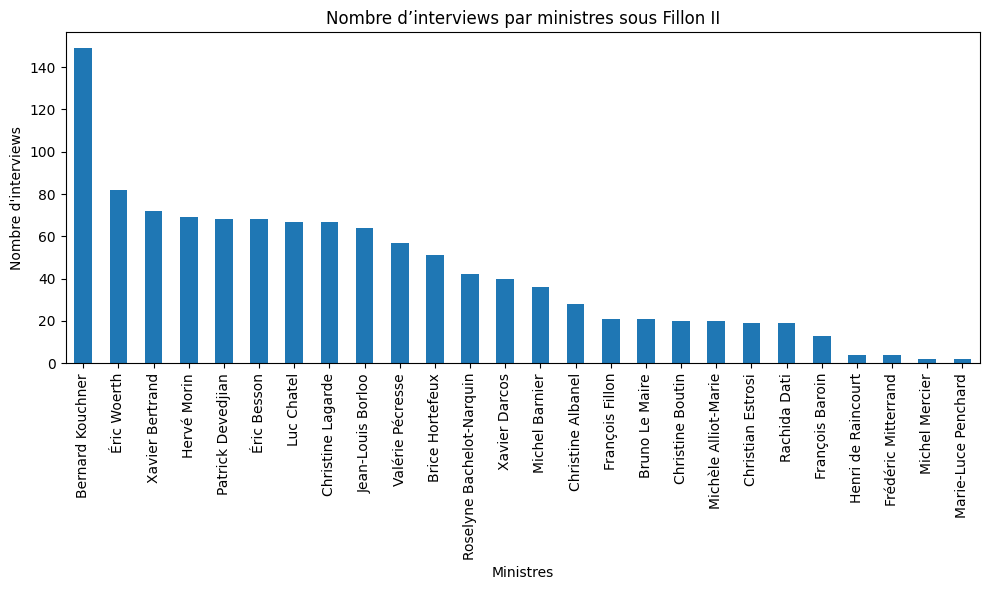

In [78]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Fillon2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d’interviews par ministres sous Fillon II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Sous Ayrault II

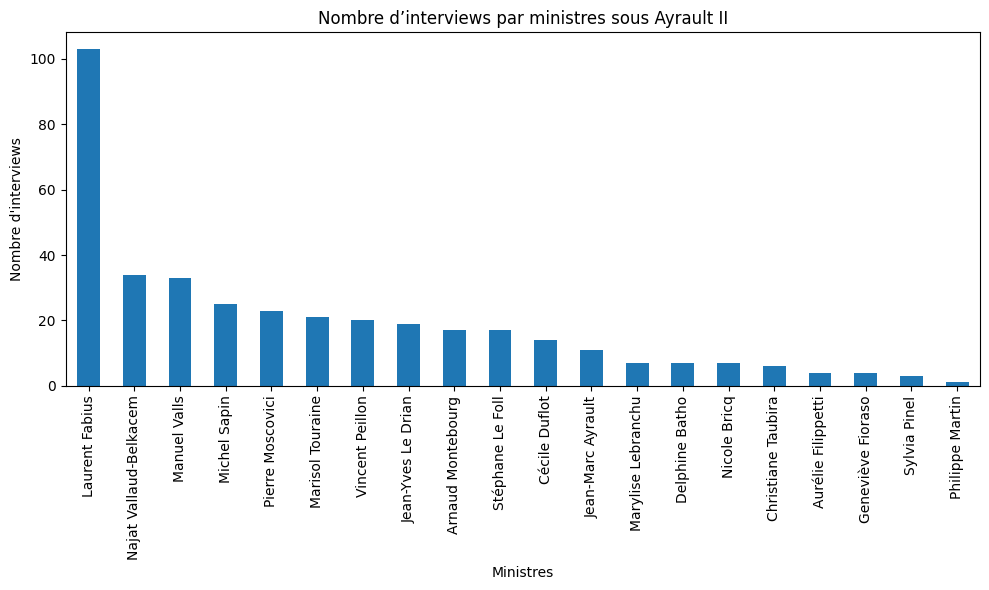

In [79]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Ayrault2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d’interviews par ministres sous Ayrault II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Sous Valls II

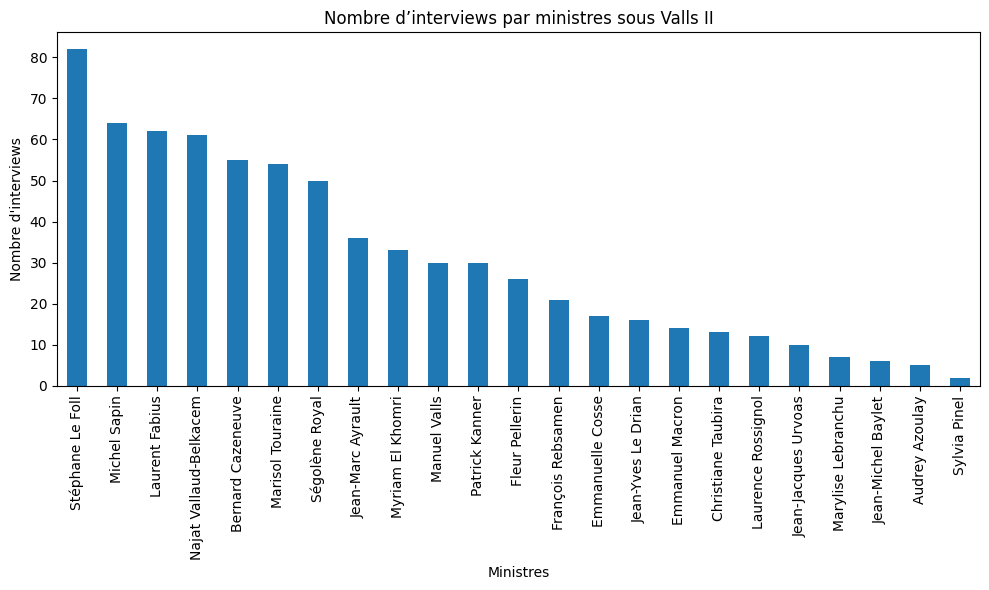

In [80]:
import matplotlib.pyplot as plt

# Compter les occurrences
counts = df_Valls2['intervenants_metiers'].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Nombre d’interviews par ministres sous Valls II")
plt.xlabel("Ministres")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Combien de ministres représentés dans les df après nettoyage

In [81]:
noms_uniques_Fillon2 = df_Fillon2['intervenants_metiers'].unique()

In [82]:
len(noms_uniques_Fillon2)

26

In [83]:
noms_uniques_Ayrault2 = df_Ayrault2['intervenants_metiers'].unique()

In [84]:
len(noms_uniques_Ayrault2)

20

In [85]:
noms_uniques_Valls2 = df_Valls2['intervenants_metiers'].unique()

In [86]:
len(noms_uniques_Valls2)

23

### Quels sont les différents médias représentés dans mon corpus

#### Sous Fillon II

In [87]:
noms_uniques_Ayrault2 = df_Ayrault2['Media'].unique()

In [88]:
len(noms_uniques_Ayrault2)

36

#### Sous Fillon II

In [89]:
noms_uniques_Fillon2 = df_Fillon2['Media'].unique()

In [90]:
len(noms_uniques_Fillon2)

56

#### Sous Valls II

In [91]:
noms_uniques_Valls2 = df_Valls2['Media'].unique()

In [92]:
len(noms_uniques_Valls2)

44

### Graphique du nombre d'interview par médias pour toutes mes données 

In [93]:
Total_df = pd.concat([ df_Fillon2, df_Ayrault2, df_Valls2], ignore_index=True)

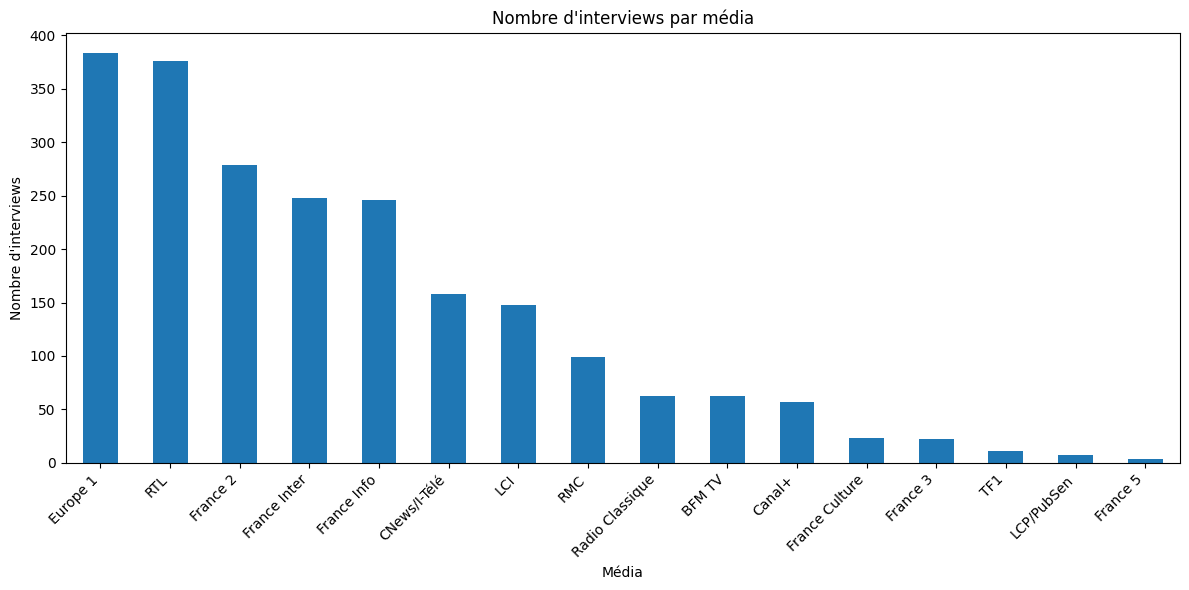

In [94]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque média
media_counts = Total_df['Media_clean'].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(12, 6))
media_counts.plot(kind='bar')

# Personnalisation
plt.title("Nombre d'interviews par média")
plt.xlabel("Média")
plt.ylabel("Nombre d'interviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [95]:
noms_medias_total = Total_df['Media_clean'].unique()

In [96]:
noms_medias_total

array(['France Inter', 'France 2', 'France Info', 'RTL', 'RMC', 'LCI',
       'Europe 1', 'CNews/I-Télé', 'Radio Classique', 'Canal+',
       'France 3', 'TF1', 'BFM TV', 'France 5', 'France Culture',
       'LCP/PubSen'], dtype=object)

### Ajout d'une colonne "parti_ministre" et d'une colonne "score_ministre"

### Importation du csv Hills Survey 1999-2019

In [97]:
import pandas as pd

# Charger les données
df = pd.read_csv('1999-2019_CHES_dataset_means.csv')

### Garder uniquement les données sur la France et les années 2002 à 2019

In [98]:
df_france = df[(df['country'] == 6) & (df['year'].between(2002, 2019))]

In [99]:
print(sorted(df_france['year'].dropna().unique()))


[2002, 2006, 2010, 2014, 2019]


### Ajout des colonnes scores pour les minsitre pour df_Fillon2

In [101]:
def trouver_score_proche(row):
    pid = row['party_id']
    annee = row['year']
    
    # Scores disponibles pour ce parti
    scores_parti = df_france[df_france['party_id'] == pid]
    
    if scores_parti.empty:
        return None
    
    # Si l'année existe, prendre directement le score
    if annee in scores_parti['year'].values:
        return scores_parti.loc[scores_parti['year'] == annee, 'lrgen'].values[0]
    
    # Sinon, trouver l'année la plus proche
    scores_parti = scores_parti.copy()
    scores_parti['ecart'] = abs(scores_parti['year'] - annee)
    score_proche = scores_parti.sort_values(by='ecart').iloc[0]['lrgen']
    
    return score_proche

In [102]:
df_france = df_france.copy()
df_Fillon2 = df_Fillon2.copy()

df_Fillon2['parti_ministre'] = df_Fillon2['intervenants_metiers'].map(ministres_FillonII_parti)
df_Fillon2['party_id'] = df_Fillon2['parti_ministre'].map(dict_corr_parti_score)
df_Fillon2['party_id'] = df_Fillon2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Fillon2['year'] = pd.to_datetime(df_Fillon2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [103]:
df_Fillon2['score_ministre'] = df_Fillon2.apply(trouver_score_proche, axis=1)

In [104]:
def corriger_score(row):
    if pd.notna(row['score_ministre']):
        return row['score_ministre']
    year = row['year']
    if row['parti_ministre'] == 'DVD':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['PS']]
    elif row['parti_ministre'] == 'DVG':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['UMP']]
    elif row['parti_ministre'] == 'PE':
        ref = df_france[df_france['party_id'] == dict_corr_parti_score['PS']]
    else:
        return None

    if ref.empty:
        return None
    ref['ecart'] = abs(ref['year'] - year)
    score_base = ref.sort_values(by='ecart').iloc[0]['lrgen']
    
    if row['parti_ministre'] == 'DVD':
        return score_base + 1.5
    elif row['parti_ministre'] == 'DVG':
        return score_base - 1.5
    elif row['parti_ministre'] == 'PE':
        return score_base - 0.5

In [105]:
df_Fillon2['score_ministre'] = df_Fillon2.apply(corriger_score, axis=1)

### Ajout des colonnes scores pour les ministres pour df_Ayrault2

In [107]:
df_france = df_france.copy()
df_Ayrault2 = df_Ayrault2.copy()

df_Ayrault2['parti_ministre'] = df_Ayrault2['intervenants_metiers'].map(ministres_AyraultII_parti)
df_Ayrault2['party_id'] = df_Ayrault2['parti_ministre'].map(dict_corr_parti_score)
df_Ayrault2['party_id'] = df_Ayrault2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Ayrault2['year'] = pd.to_datetime(df_Ayrault2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [108]:
df_Ayrault2['score_ministre'] = df_Ayrault2.apply(trouver_score_proche, axis=1)

In [109]:
df_Ayrault2['score_ministre'] = df_Ayrault2.apply(corriger_score, axis=1)

### Ajout des colonnes scores pour les ministres pour df_Valls2

In [110]:
df_france = df_france.copy()
df_Valls2 = df_Valls2.copy()

df_Valls2['parti_ministre'] = df_Valls2['intervenants_metiers'].map(ministres_VallsII_parti)
df_Valls2['party_id'] = df_Valls2['parti_ministre'].map(dict_corr_parti_score)
df_Valls2['party_id'] = df_Valls2['party_id'].astype(str)
df_france['party_id'] = df_france['party_id'].astype(str)
df_Valls2['year'] = pd.to_datetime(df_Valls2['Date'], errors='coerce').dt.year.astype('Int64')
df_france['year'] = df_france['year'].astype('Int64')

In [111]:
df_Valls2['score_ministre'] = df_Valls2.apply(trouver_score_proche, axis=1)

In [112]:
df_Valls2['score_ministre'] = df_Valls2.apply(corriger_score, axis=1)

## Ajouter le score de chaque média pour chaque interview

In [113]:
df_score_media = pd.read_csv('/Users/chloe/docs_Jupyter/code_memoire/score_media.csv')

### Pour Fillon II

In [114]:
# S'assurer que les noms de médias sont bien du même type (str)
df_Fillon2['Media_clean'] = df_Fillon2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Créer un dictionnaire de correspondance Media → Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Fillon2['score_media'] = df_Fillon2['Media_clean'].map(dict_score_media)

### Pour Ayrault II

In [116]:
# S'assurer que les noms de médias sont bien du même type (str)
df_Ayrault2['Media_clean'] = df_Ayrault2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Créer un dictionnaire de correspondance Media → Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Ayrault2['score_media'] = df_Ayrault2['Media_clean'].map(dict_score_media)

### Pour Valls II

In [117]:
# S'assurer que les noms de médias sont bien du même type (str)
df_Valls2['Media_clean'] = df_Valls2['Media_clean'].astype(str)
df_score_media['Media'] = df_score_media['Media'].astype(str)

# Créer un dictionnaire de correspondance Media → Score
dict_score_media = dict(zip(df_score_media['Media'], df_score_media['Score_normalise']))

# Ajouter la colonne 'score_media' dans df_Fillon2
df_Valls2['score_media'] = df_Valls2['Media_clean'].map(dict_score_media)


## Nettoyage des données avant LDA

### Importation des librairies et "fr_core_news_lg"

In [118]:
import spacy
import re 

In [119]:
nlp = spacy.load("fr_core_news_lg")

### Couper le df pour avoir une case par intervention (grâce au "\n" et "Q-" et "R-")

In [120]:
def split_interventions(text):
    # Découpe par \n, R - , Q - , Q-, et élimine les espaces et retours à la ligne
    split_text = re.split(r'\s*(?:\n|R\s*-|Q\s*-|Q-)\s*', text)
    return split_text

#### Appliquer à df_Fillon2

In [121]:
df_Fillon2 = df_Fillon2.assign(Texte=df_Fillon2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

#### Appliquer à df_Ayrault2

In [122]:
df_Ayrault2 = df_Ayrault2.assign(Texte=df_Ayrault2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

#### Appliquer à df_Valls2

In [123]:
df_Valls2 = df_Valls2.assign(Texte=df_Valls2["Texte"].apply(split_interventions)).explode("Texte").reset_index(drop=True)

### Supprimer les cases de "Texte" où il n'y a que des lettres majuscules, espaces et tirés

In [124]:
import re

# Fonction pour tester si une chaîne est uniquement composée de majuscules, tirets et espaces
def is_uppercase_only(text):
    if pd.isna(text):
        return False
    cleaned = text.strip()
    # Supprime les doubles espaces, tabulations éventuelles
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # Vérifie si le texte correspond exactement à des mots en majuscules + espaces/tirets
    return re.fullmatch(r"[A-ZÉÈÀÇÂÎÛÔÜËÏÖÆŒ\s\-]+", cleaned) is not None

#### Appliquer à df_Fillon2

In [125]:
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].apply(is_uppercase_only)]

#### Appliquer à df_Ayrault2

In [126]:
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].apply(is_uppercase_only)]

#### Appliquer à df_Valls2

In [127]:
df_Valls2 = df_Valls2[~df_Valls2['Texte'].apply(is_uppercase_only)]

### Supprimer les "R-" "R -" et les "Q-" "Q -"

#### Appliquer à df_Fillon2

In [128]:
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R -', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q -', '', regex=False)


df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R.', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('R.-', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q.', '', regex=False)
df_Fillon2['Texte'] = df_Fillon2['Texte'].str.replace('Q.-', '', regex=False)

#### Appliquer à df_Ayrault2

In [129]:
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R -', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q -', '', regex=False)

df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R.', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('R.-', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q.', '', regex=False)
df_Ayrault2['Texte'] = df_Ayrault2['Texte'].str.replace('Q.-', '', regex=False)

#### Appliquer à df_Valls2

In [130]:
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R -', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q -', '', regex=False)


df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R.', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('R.-', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q.', '', regex=False)
df_Valls2['Texte'] = df_Valls2['Texte'].str.replace('Q.-', '', regex=False)


### Supprimer les lignes vides ou Nan

#### Appliquer à df_Fillon2

In [131]:
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].isna()]  # Supprime les NaN
df_Fillon2 = df_Fillon2[df_Fillon2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

#### Appliquer à df_Ayrault2

In [132]:
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].isna()]  # Supprime les NaN
df_Ayrault2 = df_Ayrault2[df_Ayrault2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

#### Appliquer à df_Valls2

In [133]:
# Supprimer les lignes où la colonne 'Texte' est vide ou ne contient que des espaces blancs
df_Valls2 = df_Valls2[~df_Valls2['Texte'].isna()]  # Supprime les NaN
df_Valls2 = df_Valls2[df_Valls2['Texte'].str.strip() != '']  # Supprime les lignes vides ou avec uniquement des espaces

### Supprimer les lignes contenants uniquement des symboles non alphabétiques

In [134]:
import re

def only_symbols(text):
    if pd.isna(text):
        return False
    cleaned = text.strip()
    # Supprime les doubles espaces ou tabulations
    cleaned = re.sub(r'\s+', ' ', cleaned)
    # Vérifie si le texte ne contient que ponctuations, tirets, slashs, etc.
    return re.fullmatch(r'[\.\,\-\_/\\\s]+', cleaned) is not None

#### Appliquer à df_Fillon2

In [135]:
# Suppression des lignes correspondantes
df_Fillon2 = df_Fillon2[~df_Fillon2['Texte'].apply(only_symbols)]

#### Appliquer à df_Ayrault2

In [136]:
# Suppression des lignes correspondantes
df_Ayrault2 = df_Ayrault2[~df_Ayrault2['Texte'].apply(only_symbols)]

#### Appliquer à df_Valls2

In [137]:
# Suppression des lignes correspondantes
df_Valls2 = df_Valls2[~df_Valls2['Texte'].apply(only_symbols)]

## Supprimer le nom de la personne qui est interviewée dans le texte de l'interview

In [138]:
import pandas as pd
import re
from unidecode import unidecode

# Fonction pour enlever les accents
def remove_accents(string):
    return unidecode(string) if isinstance(string, str) else ""

# Fonction principale
def remove_words_from_text(text, words_to_remove):
    if not isinstance(text, str):  
        return text  # Ignore les NaN ou valeurs non textuelles
    if not isinstance(words_to_remove, str) or words_to_remove.strip() == "":  
        return text  # Si pas de mots à supprimer, on retourne le texte tel quel

    # Normaliser les mots à supprimer (suppression des accents uniquement)
    words_to_remove = set(remove_accents(word.lower()) for word in words_to_remove.split())  

    def remove_words(matchobj):
        word = matchobj.group(0)  # Mot trouvé dans le texte
        if remove_accents(word.lower()) in words_to_remove:  # Comparaison sans accents
            return ''  # Supprime le mot
        else:
            return word  # Garde le mot

    # Remplacement des mots trouvés dans le texte (avec délimitation des mots)
    cleaned_text = re.sub(r'\b\w+\b', remove_words, text)  

    # Supprimer les espaces en trop
    return ' '.join(cleaned_text.split())

#### Appliquer à df_Fillon2

In [139]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Fillon2["Texte"] = df_Fillon2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

#### Appliquer à df_Ayrault2

In [140]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Ayrault2["Texte"] = df_Ayrault2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

#### Appliquer à df_Valls2

In [141]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Valls2["Texte"] = df_Valls2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["intervenants_metiers"]),
    axis=1
)

### Supprimer le nom du journaliste (si il y en a un mentionné) dans l'interview

#### Appliquer à df_Fillon2

In [142]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Fillon2["Texte"] = df_Fillon2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

#### Appliquer à df_Ayrault2

In [143]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Ayrault2["Texte"] = df_Ayrault2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

#### Appliquer à df_Valls2

In [144]:
# Appliquer la fonction à la colonne "Texte" du DataFrame
df_Valls2["Texte"] = df_Valls2.apply(
    lambda row: remove_words_from_text(row["Texte"], row["interviewer_metier"]),
    axis=1
)

### Ajouter une colonne indiquant si c'est le journaliste ou le ministre qui parle

#### Appliquer à df_Fillon2

In [145]:
df_Fillon2["Qui_parle"] = (
    df_Fillon2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

#### Appliquer à df_Ayrault2

In [146]:
df_Ayrault2["Qui_parle"] = (
    df_Ayrault2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

#### Appliquer à df_Valls2

In [147]:
df_Valls2["Qui_parle"] = (
    df_Valls2.groupby("web-scraper-order").cumcount() % 2
).map({0: "Journaliste", 1: "Ministre"})

### Regrouper les 3 df et créer un df contenant uniquement le contenu des interviews

In [148]:
import pandas as pd

# Concaténer les DataFrames
df_3_gouv = pd.concat([df_Fillon2, df_Ayrault2, df_Valls2], ignore_index=True)

In [149]:
data_3_gouv = df_3_gouv['Texte']

In [150]:
len(data_3_gouv)

115449

### Creation d'une liste de documents spaCy

In [151]:
spacy_docs_3gouv = list(nlp.pipe(data_3_gouv))

In [152]:
### Supprimer tous les mots de moins de 3 caractères
### Supprimer tous les stop-words
### Lemmatiser les mots restants
### Lettre ces mots en minuscules

In [153]:
#liste de stopwords personnalisés
stop_words_fr_pol = [
    "politique","information","parti","aller","ministre","heure", "peut-être", "falloir","français","france","arriver","année", "2012","2014","2015","2016", "2017", "2018", "2019","trouver","question", "année",
    "je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles", "temps", "personne",
    "le", "la", "les", "l'", "un", "une", "des", "du", "de", "d'", 
    "à", "dans", "sur", "pour", "avec", "par", "en", "entre", "sans", 
    "sous", "vers", "chez", "à", "cette", "ces", "ce", "il", "elle", 
    "ils", "elles", "ceci", "cela", "celui", "celle", "ceux", "celles", 
    "qui", "que", "quoi", "dont", "où", "quand", "comment", "pourquoi", 
    "combien", "tel", "telle", "tels", "telles", "c'est", "ce sont", "ça", 
    "ça", "moi", "toi", "lui", "elle", "nous", "vous", "eux", "elles", 
    "être", "avoir", "faire", "prendre", "dire", "pouvoir", "devoir", 
    "savoir", "vouloir", "venir", "voir", "mettre", "passer", "aussi", "encore", "déjà", "bien", "mal", "tout", "tous", 
    "toute", "toutes", "chaque", "quelques", "beaucoup", "très", "moins", 
    "plus", "presque", "encore", "ne", "pas", "ni", "que", "quand", 
    "avant", "après", "pendant", "car", "donc", "mais", "ou", "et", 
    "si", "sur", "afin", "alors", "comme", "parce que", "merci", 
    "bonjour", "bonsoir", "salut", "bienvenue", "au revoir", "merci", 
    "désolé", "excusez", "je vous en prie", "oui", "non", "enfin", "toutefois",
    "autrement", "finalement", "ensuite", "sinon", "cependant", "tandis que", 
    "lorsque", "quoi", "quoi que", "pourtant", "ni", "aucun", "aucune", 
    "quand bien même", "toujours", "souvent", "jamais", "quel", "quelle", 
    "quels", "quelles", "quelque", "quelques-uns", "quelques-unes", "là",
    "ci", "là-bas", "ici", "aujourd'hui", "demain", "hier", "maintenant", 
    "plus tard", "bientôt", "déjà", "tout de suite",
    "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", 
    "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", 
    "alors", "anterieur", "anterieure", "anterieures", "apres", "après", 
    "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", 
    "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", 
    "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", 
    "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", 
    "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", 
    "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", 
    "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", 
    "bigre", "bon", "boum", "bravo", "brrr", "car", "ce", "ceci", "cela", 
    "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", 
    "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", 
    "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", 
    "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", 
    "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", 
    "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", 
    "clic", "combien", "comme", "comment", "comparable", "comparables", 
    "compris", "concernant", "contre", "couic", "crac", "da", "dans", "de", 
    "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", 
    "derniere", "derriere", "derrière", "des", "desormais", "desquelles", 
    "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", 
    "devant", "devers", "devra", "devrait", "different", "differentes", 
    "differents", "différent", "différente", "différentes", "différents", 
    "dire", "directe", "directement", "dit", "dite", "dits", "divers", 
    "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", 
    "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", 
    "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", 
    "effet", "egalement", "eh", "elle", "elle-même", 
    "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", 
    "environ", "essai", "est", "et", "etant", "etre", "eu", "eue", "eues", 
    "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", 
    "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", 
    "extenso", "exterieur", "eûmes", "eût", "eûtes", "fais", "faisaient", 
    "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", 
    "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", 
    "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "ha", 
    "haut", "hein", "hem", "hep", "hi", "ho", "holà", "hop", "hormis", "hors", 
    "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", 
    "hélas", "ici", "il", "ils", "importe", "jusqu", "jusque", "juste", 
    "l", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", 
    "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", 
    "lui-meme", "lui-même", "là", "lès", "ma", "maintenant", "mais", "malgré", 
    "me", "meme", "mes", "mien", "mienne", "miennes", "miens", "mille", 
    "moi", "moins", "mon", "morceau", "mot", "même", "même", "mêmes", 
    "ne", "ni", "ni", "non", "nord", "nous", "nous-mêmes", "nouveau", 
    "nouveaux", "nul", "nulle", "nullepart", "o", "oilà", "au", "avec", 
    "auquel", "ailleurs", "autour", "parceque", "est", "ce", "cette", "leur", 
    "allez", "voici", "ou", "la", "très", "ainsi", "y", "bon", "et", 
    "ils", "si", "n'y", "enfin","être","matin","monsieur", "bonjour","hier", "venir", "beaucoup", "avoir", "soir", "jour", "poursuivre", "mise", "continuer", "jusque", "bien", "jour", "faire", "savoir", "passer", "place", "évidemment", "aujourd'hui", "exemple", "mettre", "prendre", "suivre", "invité", "charger", "vouloir", "dire", "prendre", "poser", "placer", "voir", "chose", "prendre", "sujet", "fois", "évidemment", "permettre", "moment", "regarder"
]

In [154]:
%%time

docs = []
for doc in spacy_docs_3gouv:
    tokens = []
    for token in doc:
        if len(token.orth_) > 3 and not token.is_stop and token.lemma_.lower() not in stop_words_fr_pol: 
            tokens.append( token.lemma_.lower() )  
    docs.append( tokens )

CPU times: user 16.5 s, sys: 300 ms, total: 16.8 s
Wall time: 17.3 s


### Bigrams

In [155]:
import re
import numpy as np
from gensim.models import Phrases

In [156]:
bigram = Phrases(docs, min_count=20)

for index in range(len(docs)):
    for token in bigram[docs[index]]:
        if '_' in token:  # les bigrammes peuvent être reconnus par "_" qui concatène les mots
            docs[index].append(token) # TODO

### Création du dictionnaire

In [157]:
from gensim.corpora import Dictionary

In [158]:
dictionary = Dictionary(docs)
print('Nombre de mots unique dans les documents initiaux :', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents :', len(dictionary))

print("Exemple :", dictionary.doc2bow(docs[4]))

Nombre de mots unique dans les documents initiaux : 29668
Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents : 15348
Exemple : [(23, 1), (31, 1), (32, 1)]


In [159]:
corpus = [ dictionary.doc2bow(doc) for doc in docs] # TODO

### Identification du nombre de topic idéal pour la LDA

#### Mesure du coherence score

Num Topics: 2, Coherence Score: 0.7249438384506084
Num Topics: 4, Coherence Score: 0.6988522023587536
Num Topics: 6, Coherence Score: 0.6431697809042939
Num Topics: 8, Coherence Score: 0.6522017100750218
Num Topics: 10, Coherence Score: 0.6561559319082175
Num Topics: 12, Coherence Score: 0.6732922901276043
Num Topics: 14, Coherence Score: 0.6170799803140069
Num Topics: 16, Coherence Score: 0.6585342051912175
Num Topics: 18, Coherence Score: 0.6308910889206069
Num Topics: 20, Coherence Score: 0.5952719582752597
Num Topics: 22, Coherence Score: 0.597285982920908
Num Topics: 24, Coherence Score: 0.5825729099446895


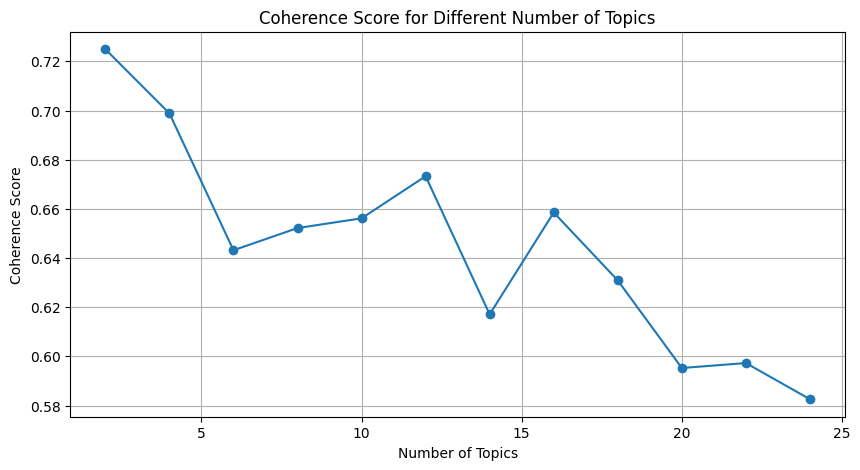

In [160]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel

# Define range of topics to test
num_topics_range = list(range(2, 25, 2))  # Testing 2, 4, 6, ..., 24 topics
coherence_scores = []

for num_topics in num_topics_range:
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, random_state=1)
    
    # Compute Coherence Score
    coherence_model = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Store the score
    coherence_scores.append(coherence_score)
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot Coherence Score
plt.figure(figsize=(10, 5))
plt.plot(num_topics_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Number of Topics")
plt.grid()
plt.show()

### Mesure du nombre de topic idéal par la méthode de l'article 

Début du calcul des métriques...
Entraînement pour 4 topics...
  Mini-modèle 1/3 pour 4 topics...
  Mini-modèle 2/3 pour 4 topics...
  Mini-modèle 3/3 pour 4 topics...
Terminé pour 4 topics.
Entraînement pour 6 topics...
  Mini-modèle 1/3 pour 6 topics...
  Mini-modèle 2/3 pour 6 topics...
  Mini-modèle 3/3 pour 6 topics...
Terminé pour 6 topics.
Entraînement pour 8 topics...
  Mini-modèle 1/3 pour 8 topics...
  Mini-modèle 2/3 pour 8 topics...
  Mini-modèle 3/3 pour 8 topics...
Terminé pour 8 topics.
Entraînement pour 10 topics...
  Mini-modèle 1/3 pour 10 topics...
  Mini-modèle 2/3 pour 10 topics...
  Mini-modèle 3/3 pour 10 topics...
Terminé pour 10 topics.
Entraînement pour 12 topics...
  Mini-modèle 1/3 pour 12 topics...
  Mini-modèle 2/3 pour 12 topics...
  Mini-modèle 3/3 pour 12 topics...
Terminé pour 12 topics.
Entraînement pour 14 topics...
  Mini-modèle 1/3 pour 14 topics...
  Mini-modèle 2/3 pour 14 topics...
  Mini-modèle 3/3 pour 14 topics...
Terminé pour 14 topics.
Entr

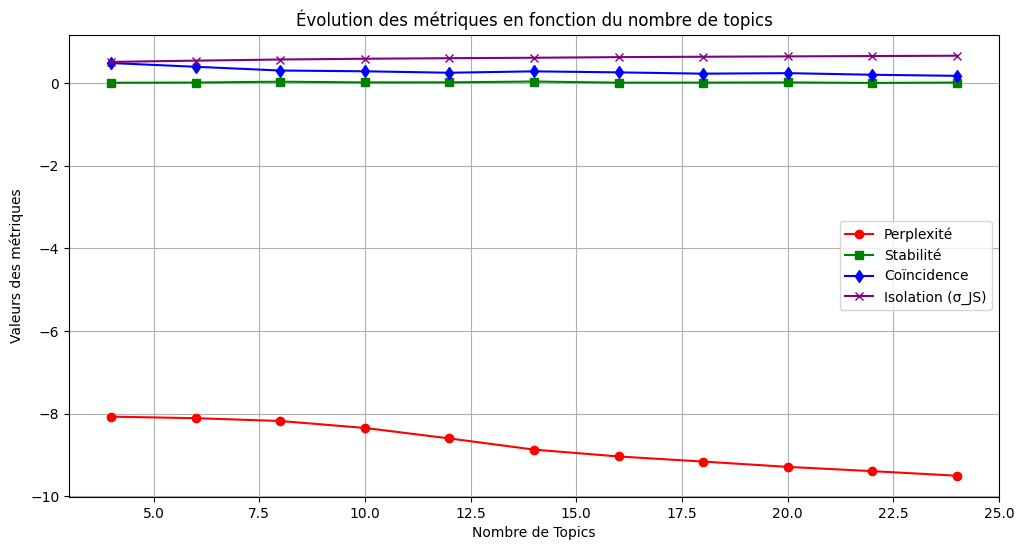


 Le nombre optimal de topics est : 4


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from scipy.spatial.distance import jensenshannon
import random

# Paramètres
topic_numbers = list(range(4, 26, 2))  # De 2 à 24 topics
num_samples = 3  # Réduction du nombre d’échantillons
beta = 0.5  # Taille du sous-échantillon
passes = 3  # Nombre de passes pour l'entraînement

# Listes de stockage
stabilities = []
coincidences = []
sigma_JS = []
perplexities = []

print("Début du calcul des métriques...")

# Boucle sur les différents nombres de topics
for num_topics in topic_numbers:
    print(f"Entraînement pour {num_topics} topics...")

    # Entraînement du modèle de référence
    lda_ref = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, workers=4, random_state=1)

    # Perplexité
    perplexity = lda_ref.log_perplexity(corpus)
    perplexities.append(perplexity)

    stability_scores = []
    coincidence_scores = []
    js_distances = []

    for j in range(num_samples):
        print(f"  Mini-modèle {j+1}/{num_samples} pour {num_topics} topics...")

        sampled_indices = random.sample(range(len(corpus)), int(beta * len(corpus)))
        sampled_corpus = [corpus[i] for i in sampled_indices]

        lda_sample = LdaMulticore(corpus=sampled_corpus, id2word=dictionary, num_topics=num_topics, passes=passes, workers=4, random_state=1)

        # Stabilité
        coherence_ref = CoherenceModel(model=lda_ref, texts=docs, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_sample = CoherenceModel(model=lda_sample, texts=docs, dictionary=dictionary, coherence='c_v').get_coherence()
        stability_scores.append(abs(coherence_ref - coherence_sample))

        # Coïncidence
        top_words_ref = [set([word for word, _ in lda_ref.show_topic(t, topn=10)]) for t in range(num_topics)]
        top_words_sample = [set([word for word, _ in lda_sample.show_topic(t, topn=10)]) for t in range(num_topics)]
        overlap_ratios = [len(top_words_ref[t] & top_words_sample[t]) / len(top_words_ref[t] | top_words_sample[t]) for t in range(num_topics)]
        coincidence_scores.append(np.mean(overlap_ratios))

        # Isolation (σ_JS)
        topic_distributions = [lda_ref.get_topics()[t] for t in range(num_topics)]
        js_vals = [jensenshannon(topic_distributions[i], topic_distributions[j]) for i in range(num_topics) for j in range(i+1, num_topics)]
        js_distances.append(np.mean(js_vals))

    # Stocker les moyennes
    stabilities.append(np.mean(stability_scores))
    coincidences.append(np.mean(coincidence_scores))
    sigma_JS.append(np.mean(js_distances))

    print(f"Terminé pour {num_topics} topics.")

# Calcul du Topic Score
topic_scores = (np.array(perplexities) * np.array(coincidences)) / (np.array(sigma_JS) * np.array(stabilities))

# Trouver le meilleur nombre de topics
best_topic_index = np.argmin(topic_scores)
best_topic_number = topic_numbers[best_topic_index]

# Résultats en DataFrame
df_results = pd.DataFrame({
    "Nombre de Topics": topic_numbers,
    "Perplexité": perplexities,
    "Stabilité": stabilities,
    "Coïncidence": coincidences,
    "Isolation (σ_JS)": sigma_JS,
    "Topic Score": topic_scores
})

print("\n Résultats des métriques :")
print(df_results)

# Tracer les résultats
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Nombre de Topics")
ax1.set_ylabel("Valeurs des métriques", color="black")
ax1.plot(topic_numbers, perplexities, marker="o", color="red", label="Perplexité")
ax1.plot(topic_numbers, stabilities, marker="s", color="green", label="Stabilité")
ax1.plot(topic_numbers, coincidences, marker="d", color="blue", label="Coïncidence")
ax1.plot(topic_numbers, sigma_JS, marker="x", color="purple", label="Isolation (σ_JS)")
ax1.legend()
ax1.grid()
plt.title("Évolution des métriques en fonction du nombre de topics")
plt.show()

# Afficher le meilleur nombre de topics
print(f"\n Le nombre optimal de topics est : {best_topic_number}")


## Topic Modeling avec LDA

In [162]:
%%time
from gensim.models import LdaModel

model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, chunksize=1500, passes=15, iterations=150, alpha='auto',
    eta='auto',random_state=1) 

CPU times: user 3min 34s, sys: 672 ms, total: 3min 35s
Wall time: 3min 36s


In [163]:
# Affiche les 30 mots les plus importants pour chaque topic

for i in range(model.num_topics):
    print(f"\n --- Topic {i+1}")
    top_words = model.show_topic(i, topn=30)
    for word, weight in top_words:
        print(f"{word:<20} {weight:.4f}")



 --- Topic 1
hollande             0.1042
françois_hollande    0.0937
prochain             0.0406
énergie              0.0275
préparer             0.0205
journée              0.0188
climat               0.0179
transition           0.0171
rassembler           0.0167
procédure            0.0166
négocier             0.0149
énergétique          0.0147
confirmer            0.0140
climatique           0.0137
facile               0.0134
produire             0.0134
mauvais              0.0129
environnement        0.0121
parisien             0.0112
voiture              0.0104
cesser               0.0104
transport            0.0101
transition_énergétique 0.0100
rendez-vous          0.0099
honnêtement          0.0094
cour                 0.0087
entier               0.0084
marge                0.0082
démarche             0.0080
application          0.0077

 --- Topic 2
jeune                0.0785
euro                 0.0594
milliard             0.0423
million              0.0378
policier          

In [164]:
#Afficher les 15 mots les plus présents dans chaque topics (de manière plus esthétique)

import pandas as pd
from IPython.display import display_html

# Fonction pour afficher 3 tableaux côte à côte
def display_topics_in_rows(model, topics_per_row=3, topn=15):
    topic_styles = []

    for i in range(model.num_topics):
        topic_words = model.show_topic(i, topn=topn)
        df = pd.DataFrame(topic_words, columns=["Mot", "Probabilité"])
        df.index += 1
        df.index.name = "Rang"

        styled_df = df.style \
            .background_gradient(cmap='Blues', subset=["Probabilité"]) \
            .format({"Probabilité": "{:.4f}"}) \
            .set_caption(f"Topic {i + 1}") \
            .set_table_styles([{
                'selector': 'caption',
                'props': [('color', '#0b5394'), ('font-size', '16px'), ('font-weight', 'bold')]
            }])

        topic_styles.append(styled_df.to_html())

    # Afficher les tableaux par groupe de 3 côte à côte
    for i in range(0, len(topic_styles), topics_per_row):
        group_html = ''.join(
            f'<div style="display:inline-block; margin-right:20px; vertical-align:top">{table}</div>'
            for table in topic_styles[i:i + topics_per_row]
        )
        display_html(group_html, raw=True)

# Utilisation :
display_topics_in_rows(model, topics_per_row=3, topn=15)


,Mot,Probabilité
Rang,,
1,hollande,0.1042
2,françois_hollande,0.0937
3,prochain,0.0406
4,énergie,0.0275
5,préparer,0.0205
6,journée,0.0188
7,climat,0.0179
8,transition,0.0171
9,rassembler,0.0167


,Mot,Probabilité
Rang,,
1,service,0.0541
2,état,0.0526
3,intérieur,0.0334
4,système,0.0299
5,ministère,0.0270
6,santé,0.0243
7,urgence,0.0228
8,médecin,0.0213
9,jean-pierre,0.0212


,Mot,Probabilité
Rang,,
1,sécurité,0.0575
2,national,0.0568
3,mieux,0.0439
4,trop,0.0280
5,élection,0.0268
6,expliquer,0.0260
7,guerre,0.0234
8,gagner,0.0207
9,protéger,0.0193


,Mot,Probabilité
Rang,,
1,mois,0.0782
2,europe,0.0768
3,européen,0.0707
4,affaire,0.0334
5,territoire,0.0291
6,international,0.0277
7,étranger,0.0244
8,union,0.0224
9,prix,0.0220


,Mot,Probabilité
Rang,,
1,travail,0.0967
2,entreprise,0.0831
3,mesure,0.0553
4,travailler,0.0520
5,conseil,0.0360
6,plan,0.0308
7,salarié,0.0289
8,présenter,0.0220
9,activité,0.0218


### Appliquer la LDA à tout mon corpus

Pour chaque prise de parole on ajoute le pourcentage de chaque topic dans des colonnes allant de Topic 1 à Topic 15

In [165]:
import numpy as np
import pandas as pd
from gensim.matutils import sparse2full

# Étape 1 : Calculer la distribution de topics
topic_dists = [sparse2full(model[doc], model.num_topics) for doc in corpus]
topic_cols = [f"Topic_{i+1}" for i in range(model.num_topics)]
topic_df = pd.DataFrame(topic_dists, columns=topic_cols)

# Étape 2 : Fusionner avec le DataFrame original
df_lda = pd.concat([df_3_gouv.reset_index(drop=True), topic_df], axis=1)

# Étape 3 : Identifier les lignes vides
lines_empty = [len(doc) == 0 for doc in docs]
df_lda["ligne_vide"] = lines_empty

# Étape 4 : Remplacer les distributions par NaN si la ligne est vide
df_lda.loc[df_lda["ligne_vide"], topic_cols] = np.nan

In [166]:
df_lda.columns

Index(['Unnamed: 0', 'web-scraper-order', 'web-scraper-start-url', 'link',
       'link-href', 'Texte', 'Date', 'Media', 'intervenants_metiers',
       'interviewer_metier', 'Gouvernement', 'Mandat', 'Media_clean',
       'parti_ministre', 'party_id', 'year', 'score_ministre', 'score_media',
       'Qui_parle', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
       'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11',
       'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'ligne_vide'],
      dtype='object')

### Mesure du pourcentage moyen de topic pour chaque prise de parole (comparatif entre gouvernements)

In [168]:
import pandas as pd

# Calcul des moyennes par président
sarkozy_mean = df_lda[df_lda["Mandat"] == "Sarkozy"][topic_cols].mean()
hollande_mean = df_lda[df_lda["Mandat"] == "Hollande"][topic_cols].mean()

# Créer un DataFrame combiné
mean_df = pd.DataFrame({
    "Sarkozy": sarkozy_mean,
    "Hollande": hollande_mean
}).T

# Définir une fonction de coloration personnalisée
def highlight_president(row):
    color = "#d9ead3" if row.name == "Sarkozy" else "#c9daf8"
    return [f'background-color: {color}'] * len(row)

# Appliquer le style
styled = mean_df.style \
    .apply(highlight_president, axis=1) \
    .format("{:.4f}") \
    .set_caption("Moyennes des pourcentages de topics par prise de parole par président") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', '#0b5394'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Afficher
styled

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15
Sarkozy,0.0348,0.0446,0.1917,0.0460,0.2108,0.0455,0.0513,0.0449,0.0327,0.0497,0.0491,0.0532,0.0530,0.0404,0.0523
Hollande,0.0363,0.0447,0.1917,0.0446,0.2139,0.0450,0.0517,0.0460,0.0309,0.0482,0.0476,0.0537,0.0516,0.0408,0.0531


In [169]:
### Meme tableau avec une différente présentation (plus classique)

import pandas as pd

# Calcul des moyennes par président
sarkozy_mean = df_lda[df_lda["Mandat"] == "Sarkozy"][topic_cols].mean()
hollande_mean = df_lda[df_lda["Mandat"] == "Hollande"][topic_cols].mean()

# Créer un DataFrame avec les topics en ligne et les présidents en colonnes
mean_df = pd.DataFrame({
    "Topic": topic_cols,
    "Sarkozy": sarkozy_mean.values,
    "Hollande": hollande_mean.values
})

# Réorganiser proprement
mean_df = mean_df.set_index("Topic")

# Afficher proprement avec arrondi
mean_df = mean_df.round(4)
display(mean_df)

,Sarkozy,Hollande
Topic,,
Topic_1,0.0348,0.0363
Topic_2,0.0446,0.0447
Topic_3,0.1917,0.1917
Topic_4,0.0460,0.0446
Topic_5,0.2108,0.2139
Topic_6,0.0455,0.0450
Topic_7,0.0513,0.0517
Topic_8,0.0449,0.0460
Topic_9,0.0327,0.0309


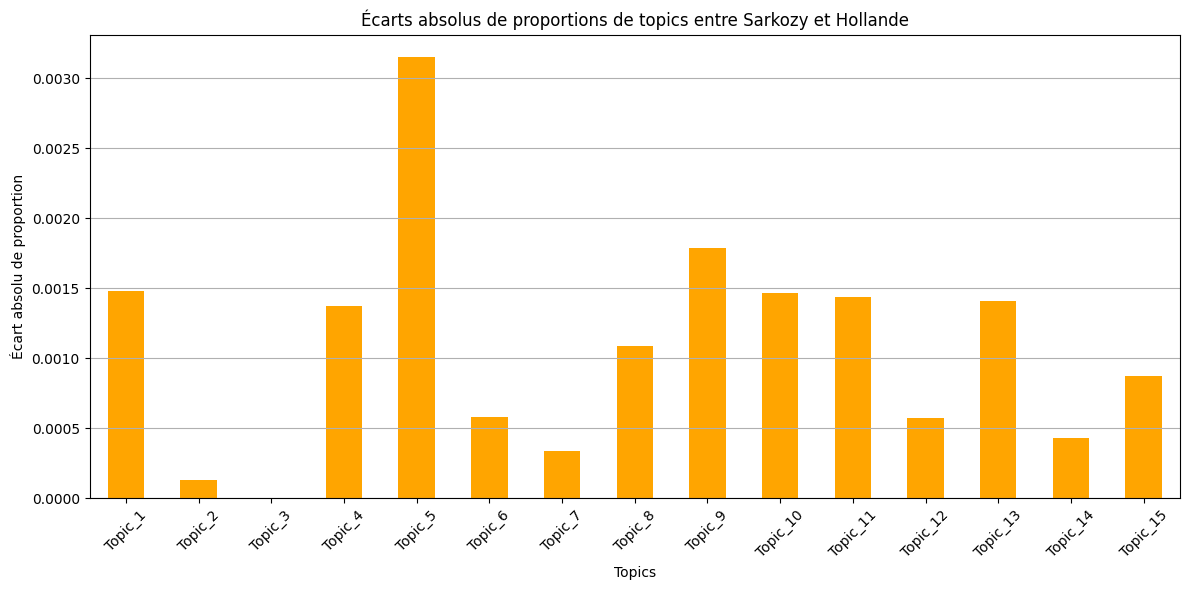

In [170]:
# Diagramme à barres des écarts absolus de proportion de topics abordés dans les sous corpus d'Hollande et de Sarkozy

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que ton DataFrame principal s'appelle df_lda
# Filtrer les lignes par mandat
sarkozy_df = df_lda[df_lda["Mandat"] == "Sarkozy"]
hollande_df = df_lda[df_lda["Mandat"] == "Hollande"]

# Sélection des colonnes de topics
topic_cols = [col for col in df_lda.columns if col.startswith("Topic_")]

# Moyennes par topic
mean_df = pd.DataFrame({
    "Sarkozy": sarkozy_df[topic_cols].mean(),
    "Hollande": hollande_df[topic_cols].mean()
}).T

# Calcul des écarts absolus
differences = (mean_df.loc["Hollande"] - mean_df.loc["Sarkozy"]).abs()

# Visualisation
plt.figure(figsize=(12, 6))
differences.plot(kind='bar', color='orange')
plt.title("Écarts absolus de proportions de topics entre Sarkozy et Hollande")
plt.ylabel("Écart absolu de proportion")
plt.xlabel("Topics")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


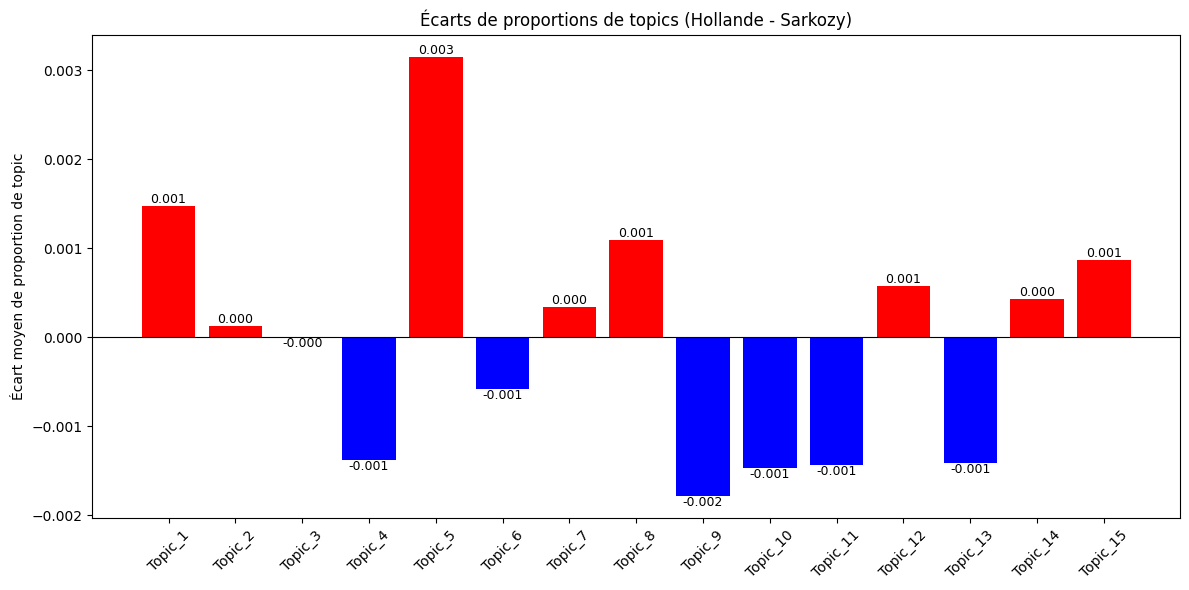

In [171]:
# Diagramme à barres des écarts (non absolus cette fois) de proportion de topics abordés dans les sous corpus d'Hollande et de Sarkozy

import pandas as pd
import matplotlib.pyplot as plt


# Calcul des différences Hollande - Sarkozy
diffs = mean_df.loc["Hollande"] - mean_df.loc["Sarkozy"]

# Définition des couleurs en fonction du signe de la différence
colors = ['red' if val > 0 else 'blue' for val in diffs]

# Création du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(diffs.index, diffs.values, color=colors)

# Lignes de base et titres
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Écarts de proportions de topics (Hollande - Sarkozy)")
plt.ylabel("Écart moyen de proportion de topic")
plt.xticks(rotation=45)

# Ajout des valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval:.3f}',
             ha='center',
             va='bottom' if yval > 0 else 'top',
             fontsize=9)

plt.tight_layout()
plt.show()

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2893378385.py:11: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_lda["Topic_principal"] = df_lda[topic_cols].idxmax(axis=1)


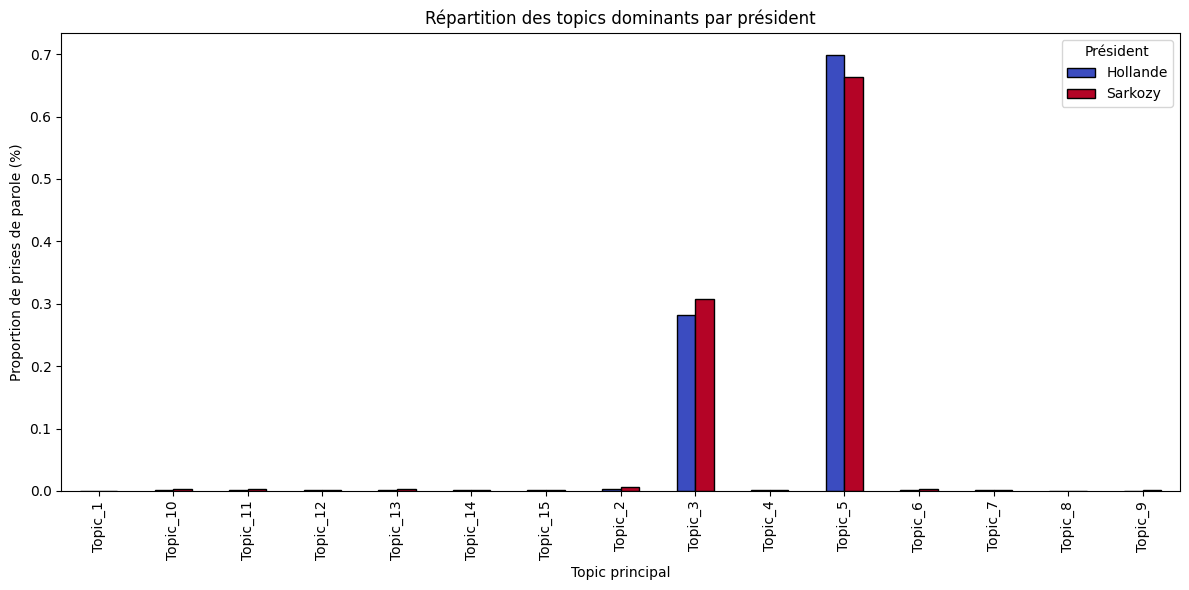

In [172]:
# Identifier pour chaque prise de parole le topic principal (plus grande proportion)
# Puis, mesurer le pourcentage d'apparition de chaque topic dominant pour les sous corpus Hollande et le sous corpus Sarkozy
# Enfin, réaliser un diagramme à barres de pourcentage d'apparition des topics dominants sous les deux sous corpus

import pandas as pd

# Étape 1 : Sélectionne les colonnes des topics contenant des données numériques
topic_cols = [col for col in df_lda.columns if col.startswith("Topic_") and pd.api.types.is_numeric_dtype(df_lda[col])]

# Étape 2 : Identifier le topic dominant (valeur la plus haute) pour chaque ligne
df_lda["Topic_principal"] = df_lda[topic_cols].idxmax(axis=1)

# Étape 3 : Compter le nombre de lignes par topic et par président (Mandat)
count_by_topic_mandat = df_lda.groupby(["Mandat", "Topic_principal"]).size().unstack(fill_value=0)

# Étape 4 : Convertir en pourcentages par président (normalisation par ligne)
percent_by_topic_mandat = count_by_topic_mandat.div(count_by_topic_mandat.sum(axis=1), axis=0)

# Étape 5 : Afficher le résultat
import matplotlib.pyplot as plt

percent_by_topic_mandat.T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor='black')
plt.title("Répartition des topics dominants par président")
plt.ylabel("Proportion de prises de parole (%)")
plt.xlabel("Topic principal")
plt.legend(title="Président")
plt.tight_layout()
plt.show()

/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2068306381.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discriminant_df.reset_index(), x='Topic_principal', y='Différence (H - S)', palette='coolwarm')


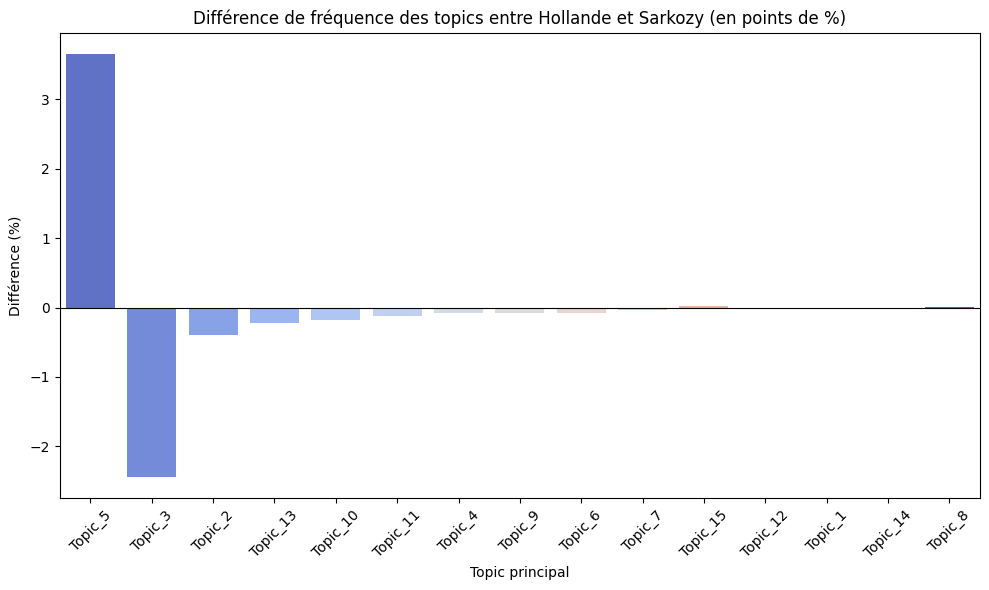

In [173]:
# Comparaison de la répartition des topics dominants dans les discours de Hollande et Sarkozy en calculant pour chaque topic la différence de fréquence (en pourcentage) entre les deux présidents
# Affichage de ces différences sous forme de graphique en barres pour visualiser quels topics distinguent le plus leurs prises de parole


import pandas as pd

# Étape 1 : Compter le nombre de lignes par topic et par mandat
topic_counts = df_lda.groupby(['Mandat', 'Topic_principal']).size().unstack(fill_value=0)

# Étape 2 : Convertir en pourcentage par mandat (normalisation ligne à 100%)
topic_percentages = topic_counts.div(topic_counts.sum(axis=1), axis=0) * 100

# Étape 3 : Calculer la différence de pourcentage Hollande - Sarkozy
topic_diff = topic_percentages.loc['Hollande'] - topic_percentages.loc['Sarkozy']

# Étape 4 : Créer un tableau final
discriminant_df = pd.DataFrame({
    'Pourcentage Hollande': topic_percentages.loc['Hollande'],
    'Pourcentage Sarkozy': topic_percentages.loc['Sarkozy'],
    'Différence (H - S)': topic_diff
}).sort_values(by='Différence (H - S)', key=abs, ascending=False)

# Affichage
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=discriminant_df.reset_index(), x='Topic_principal', y='Différence (H - S)', palette='coolwarm')
plt.title('Différence de fréquence des topics entre Hollande et Sarkozy (en points de %)')
plt.ylabel('Différence (%)')
plt.xlabel('Topic principal')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [174]:
print("Index des mandats :", topic_counts.index.tolist())

Index des mandats : ['Hollande', 'Sarkozy']


In [175]:
import pandas as pd

# Étape 1 : Calcul des fréquences
topic_counts = df_lda.groupby("Mandat")["Topic_principal"].value_counts(normalize=True).unstack(fill_value=0)

# S'assurer que tous les topics sont présents pour les deux mandats
topics = sorted(topic_counts.columns)
mandats = ["Hollande", "Sarkozy"]
topic_counts = topic_counts.reindex(index=mandats, columns=topics, fill_value=0)

# Calcul du ratio Hollande/Sarkozy (évite division par zéro)
ratios = (topic_counts.loc["Hollande", topics] / topic_counts.loc["Sarkozy", topics].replace(0, 1e-9)) * 100

# Format du résultat
comparatif_df = pd.DataFrame({
    "Hollande (%)": topic_counts.loc["Hollande", topics] * 100,
    "Sarkozy (%)": topic_counts.loc["Sarkozy", topics] * 100,
    "Ratio Hollande/Sarkozy (%)": ratios
}).round(2)

comparatif_df = comparatif_df.sort_values(by="Ratio Hollande/Sarkozy (%)", ascending=False)
print(comparatif_df)


                 Hollande (%)  Sarkozy (%)  Ratio Hollande/Sarkozy (%)
Topic_principal                                                       
Topic_15                 0.20         0.17                      116.89
Topic_5                 69.91        66.26                      105.52
Topic_8                  0.07         0.07                      105.13
Topic_14                 0.17         0.17                       97.64
Topic_3                 28.24        30.69                       92.03
Topic_12                 0.11         0.13                       83.56
Topic_1                  0.06         0.08                       81.45
Topic_7                  0.11         0.14                       74.56
Topic_6                  0.17         0.25                       68.61
Topic_4                  0.14         0.22                       61.54
Topic_11                 0.18         0.30                       59.26
Topic_10                 0.18         0.36                       49.86
Topic_

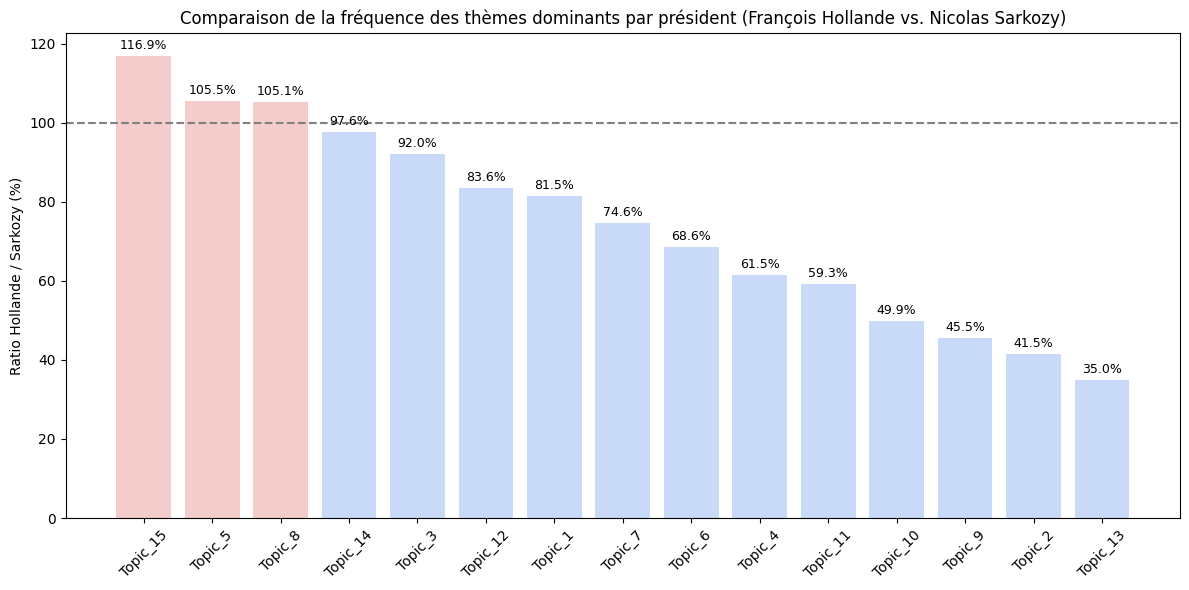

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Compter les occurrences de chaque topic principal par gouvernement
counts = df_lda.groupby(['Mandat', 'Topic_principal']).size().unstack(fill_value=0)

# S'assurer que tous les topics sont présents pour les deux présidents
topics = sorted(set(counts.columns))
counts = counts.reindex(index=['Hollande', 'Sarkozy'], columns=topics, fill_value=0)

# Étape 2 : Calculer la proportion (fréquence) par gouvernement
proportions = counts.div(counts.sum(axis=1), axis=0)

# Étape 3 : Calculer le ratio Hollande / Sarkozy en %
ratio = (proportions.loc['Hollande'] / proportions.loc['Sarkozy'].replace(0, 1e-9)) * 100

# Étape 4 : Mise en forme
ratio = ratio.sort_values(ascending=False)

# Couleurs pastel : vert clair et rouge clair
colors = ['#f4cccc' if val > 100 else '#c9daf8' for val in ratio]

# Étape 5 : Affichage du graphique avec annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(ratio.index, ratio.values, color=colors)
plt.axhline(100, color='gray', linestyle='--')
plt.ylabel('Ratio Hollande / Sarkozy (%)')
plt.title('Comparaison de la fréquence des thèmes dominants par président (François Hollande vs. Nicolas Sarkozy)')
plt.xticks(rotation=45)

# Ajout des pourcentages au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Qui oriente les thématiques abordées dans les interviews ?

### Calcul de la JS divergence moyenne Journaliste --> Ministre et Ministre --> Journaliste

In [177]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon

# Colonnes topics
topic_cols = [f"Topic_{i}" for i in range(1, 16)]
df_lda[topic_cols] = df_lda[topic_cols].astype(float)

# Listes de distances
distances_journaliste_to_ministre = []
distances_ministre_to_journaliste = []

# Parcours des lignes
for i in range(len(df_lda) - 1):
    row_current = df_lda.iloc[i]
    row_next = df_lda.iloc[i + 1]

    # Vérifier qu’on est dans la même interview
    if row_current["link-href"] != row_next["link-href"]:
        continue

    # Vérifier l’absence de NaNs
    if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
        continue

    # Extraire et convertir
    p = row_current[topic_cols].values.astype(np.float64)
    q = row_next[topic_cols].values.astype(np.float64)

    # Vérifier qu’il ne s’agit pas de vecteurs nuls
    if p.sum() == 0 or q.sum() == 0:
        continue

    # Normaliser en distribution de probabilité
    p_norm = p / p.sum()
    q_norm = q / q.sum()

    # Calcul de la divergence si les vecteurs sont valides
    if not (np.any(np.isnan(p_norm)) or np.any(np.isnan(q_norm))):
        if row_current["Qui_parle"] == "Journaliste" and row_next["Qui_parle"] == "Ministre":
            js = jensenshannon(p_norm, q_norm)
            distances_journaliste_to_ministre.append(js)

        elif row_current["Qui_parle"] == "Ministre" and row_next["Qui_parle"] == "Journaliste":
            js = jensenshannon(p_norm, q_norm)
            distances_ministre_to_journaliste.append(js)


# Filtrer les NaN éventuels dans les listes
distances_journaliste_to_ministre = [v for v in distances_journaliste_to_ministre if not np.isnan(v)]
distances_ministre_to_journaliste = [v for v in distances_ministre_to_journaliste if not np.isnan(v)]

# Résultats
print("Moyenne JS divergence (Journaliste → Ministre) :", 
      round(np.mean(distances_journaliste_to_ministre), 4))

print("Moyenne JS divergence (Ministre → Journaliste) :", 
      round(np.mean(distances_ministre_to_journaliste), 4))


/Users/chloe/miniconda3/envs/spacy/lib/python3.10/site-packages/scipy/spatial/distance.py:1271: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


📊 Moyenne JS divergence (Journaliste → Ministre) : 0.1531
📊 Moyenne JS divergence (Ministre → Journaliste) : 0.1566


### JS divergence Journaliste --> Ministre et Ministre --> Journaliste moyenne par média

In [178]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import jensenshannon

# Colonnes des topics
topic_cols = [f"Topic_{i}" for i in range(1, 16)]
df_lda[topic_cols] = df_lda[topic_cols].astype(float)

# Stockage des résultats
results = []

for media in df_lda["Media_clean"].dropna().unique():
    df_media = df_lda[df_lda["Media_clean"] == media]

    for mandat in df_media["Mandat"].dropna().unique():
        df_mandat = df_media[df_media["Mandat"] == mandat].reset_index(drop=True)

        # Listes de distances pour ce média et ce mandat
        distances_journaliste_to_ministre = []
        distances_ministre_to_journaliste = []

        for i in range(len(df_mandat) - 1):
            row_current = df_mandat.iloc[i]
            row_next = df_mandat.iloc[i + 1]

            # Même interview
            if row_current["link-href"] != row_next["link-href"]:
                continue

            # Pas de NaN
            if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
                continue

            # Vecteurs normalisés
            p = row_current[topic_cols].values.astype(np.float64)
            q = row_next[topic_cols].values.astype(np.float64)

            if p.sum() == 0 or q.sum() == 0:
                continue

            p_norm = p / p.sum()
            q_norm = q / q.sum()

            if np.any(np.isnan(p_norm)) or np.any(np.isnan(q_norm)):
                continue

            # Calcul des distances JS avec patch pour éviter les warnings
            if row_current["Qui_parle"] == "Journaliste" and row_next["Qui_parle"] == "Ministre":
                js = jensenshannon(p_norm, q_norm)
                js = np.clip(js, a_min=0.0, a_max=None)  # Patch pour éviter les warnings
                distances_journaliste_to_ministre.append(js)

            elif row_current["Qui_parle"] == "Ministre" and row_next["Qui_parle"] == "Journaliste":
                js = jensenshannon(p_norm, q_norm)
                js = np.clip(js, a_min=0.0, a_max=None)  # Patch pour éviter les warnings
                distances_ministre_to_journaliste.append(js)

        # Ajouter résultats
        results.append({
            "Media_clean": media,
            "Mandat": mandat,
            "JS_Journaliste_to_Ministre": np.mean([v for v in distances_journaliste_to_ministre if not np.isnan(v)]) if distances_journaliste_to_ministre else np.nan,
            "JS_Ministre_to_Journaliste": np.mean([v for v in distances_ministre_to_journaliste if not np.isnan(v)]) if distances_ministre_to_journaliste else np.nan
        })

# Résultats dans un DataFrame
df_js_results = pd.DataFrame(results)

df_js_results


/Users/chloe/miniconda3/envs/spacy/lib/python3.10/site-packages/scipy/spatial/distance.py:1271: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


,Media_clean,Mandat,JS_Journaliste_to_Ministre,JS_Ministre_to_Journaliste
0,France Inter,Sarkozy,0.162523,0.168152
1,France Inter,Hollande,0.157048,0.160271
2,France 2,Sarkozy,0.167389,0.172467
3,France 2,Hollande,0.159242,0.160114
4,France Info,Sarkozy,0.174851,0.178177
5,France Info,Hollande,0.149742,0.150567
6,RTL,Sarkozy,0.149164,0.153695
7,RTL,Hollande,0.145424,0.146436
8,RMC,Sarkozy,0.172852,0.173866
9,RMC,Hollande,0.154147,0.156259


### Rajout d'une métrique pour mesurer la différence de changement de sujets entre ministres et journalistes

In [179]:
# Calcul de la métrique : à quel point les journalistes orientent la conversation
df_js_results['Controle_Journaliste'] = (
    df_js_results['JS_Ministre_to_Journaliste'] - df_js_results['JS_Journaliste_to_Ministre']
)

# Tri décroissant pour voir les cas où l'écart est le plus grand
df_js_results_sorted = df_js_results.sort_values(by='Controle_Journaliste', ascending=False)

# Affichage du tableau
import pandas as pd
pd.set_option('display.max_rows', None)  # pour voir tous les résultats si besoin
df_js_results_sorted


,Media_clean,Mandat,JS_Journaliste_to_Ministre,JS_Ministre_to_Journaliste,Controle_Journaliste
10,LCI,Sarkozy,0.169840,0.178873,0.009033
23,TF1,Hollande,0.133294,0.142294,0.009000
16,Radio Classique,Sarkozy,0.165661,0.173255,0.007594
12,Europe 1,Sarkozy,0.149708,0.156190,0.006482
17,Radio Classique,Hollande,0.155706,0.161931,0.006225
0,France Inter,Sarkozy,0.162523,0.168152,0.005629
29,France Culture,Hollande,0.159254,0.164809,0.005556
22,TF1,Sarkozy,0.171749,0.177248,0.005499
30,LCP/PubSen,Hollande,0.155550,0.160933,0.005382
2,France 2,Sarkozy,0.167389,0.172467,0.005078


### Diagramme à barres du controle journalistique par gouvernement par média

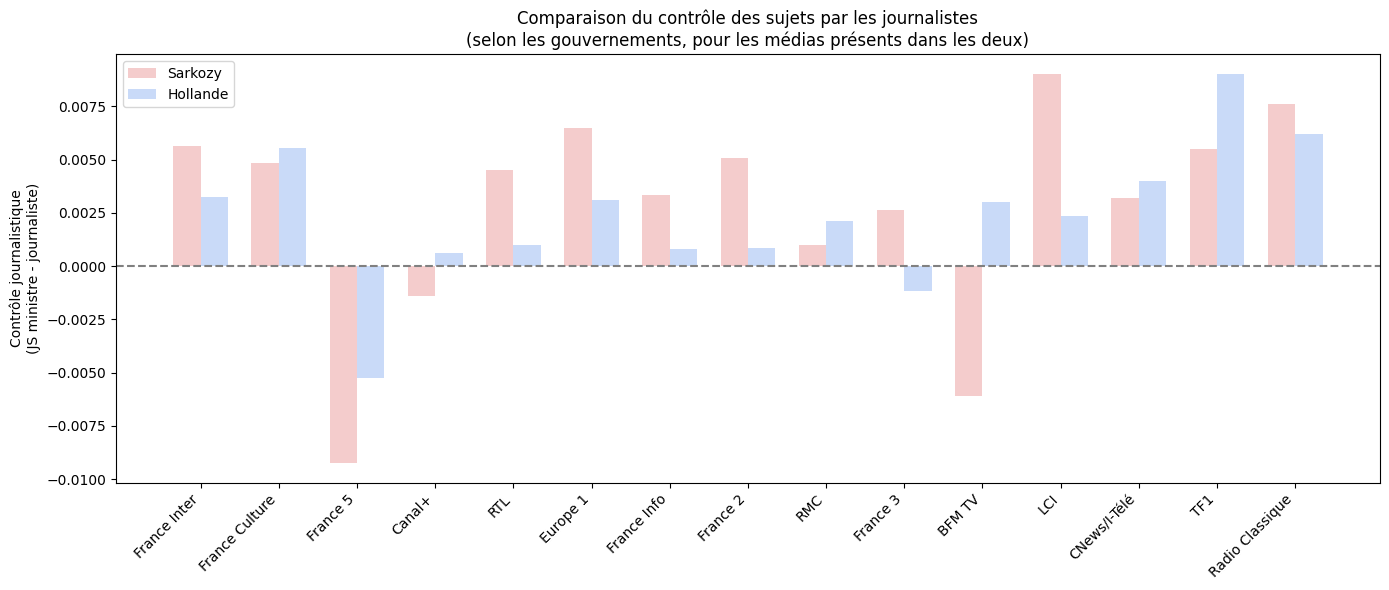

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Récupérer les scores des médias à partir du df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')

# Étape 2 : Fusionner avec les résultats JS
df_plot = df_js_results.merge(media_scores, on='Media_clean', how='left')

# Étape 3 : Calcul de la métrique de contrôle
df_plot['Controle_Journaliste'] = df_plot['JS_Ministre_to_Journaliste'] - df_plot['JS_Journaliste_to_Ministre']

# Étape 4 : Trier les médias par score politique
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# Étape 5 : Réorganiser les données
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)

# Étape 6 : Filtrer pour ne garder que les médias avec les deux gouvernements présents (valeurs non nulles)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'])  # Supprimer si l'une des deux est NaN

# Étape 7 : Création du graphique
x = np.arange(len(pivot))  # positions des groupes
width = 0.35  # largeur des barres

plt.figure(figsize=(14, 6))
bar1 = plt.bar(x - width/2, pivot['Sarkozy'], width, label='Sarkozy', color='#f4cccc')  # pastel rouge
bar2 = plt.bar(x + width/2, pivot['Hollande'], width, label='Hollande', color='#c9daf8')  # pastel bleu

plt.xticks(x, pivot.index, rotation=45, ha='right')
plt.ylabel('Contrôle journalistique\n(JS ministre - journaliste)')
plt.title('Comparaison du contrôle des sujets par les journalistes\n(selon les gouvernements, pour les médias présents dans les deux)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


### Echantillonage pour ne garder maximum que 5 interviews par ministre par media 

In [181]:
import pandas as pd

# Étape 1 : Filtrer les partis politiques
df_lda_partis = df_lda[df_lda['parti_ministre'].isin(['PS', 'UMP'])].copy()

# Étape 2 : Identifier les interviews uniques (par ministre + média + interview)
interview_ids = (
    df_lda_partis[['parti_ministre', 'Media_clean', 'link-href']]
    .drop_duplicates()
)

# Étape 3 : Limiter à 5 interviews par combinaison parti_ministre + Media_clean
interview_sampled = (
    interview_ids
    .groupby(['parti_ministre', 'Media_clean'], group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))
)

# Étape 4 : Filtrer le DataFrame principal pour ne garder que les interviews sélectionnées
df_lda_filtered1 = df_lda_partis[df_lda_partis['link-href'].isin(interview_sampled['link-href'])].copy()


/var/folders/bf/dpp1hl0x74gg20m3v0lh7p_r0000gn/T/ipykernel_9120/2098110670.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))


### Conserver uniquement les ministres issus des partis PS et UMP

In [182]:
# Étape 1 : Filtrer sur les partis PS ou UMP uniquement
df_lda_filtered2 = df_lda[df_lda['parti_ministre'].isin(['PS', 'UMP'])].copy()

# Étape 2 : Ne garder que 5 interviews maximum par ministre et média
# On identifie les interviews uniques par 'link-href'
interview_uniques = df_lda_filtered2[['intervenants_metiers', 'Media_clean', 'link-href']].drop_duplicates()

# On groupe par ministre et média et on garde les 5 premières interviews pour chaque groupe
interview_limite = (
    interview_uniques.groupby(['intervenants_metiers', 'Media_clean'])
    .head(5)
)

# Étape 3 : Filtrer le DataFrame initial selon les interviews sélectionnées
df_lda_filtered2 = df_lda_filtered2[
    df_lda_filtered2['link-href'].isin(interview_limite['link-href'])
].copy()

# Résultat
print(f"{len(df_lda_filtered2)} lignes conservées après filtrage.")

67366 lignes conservées après filtrage.


In [183]:
# Compter le nombre d'interviews uniques par Media_clean et Mandat
interview_counts = (
    df_lda_filtered2[['Media_clean', 'Mandat', 'link-href']]
    .drop_duplicates()
    .groupby(['Media_clean', 'Mandat'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Afficher le tableau
print(interview_counts)

Mandat           Hollande  Sarkozy
Media_clean                       
BFM TV                 42        1
CNews/I-Télé           57       40
Canal+                 10       26
Europe 1               87       84
France 2               62       75
France 3               11        2
France 5                2        0
France Culture         20        1
France Info            81       59
France Inter           81       71
LCI                    35       65
LCP/PubSen              6        0
RMC                    23       37
RTL                    92       75
Radio Classique        18       40
TF1                     6        1


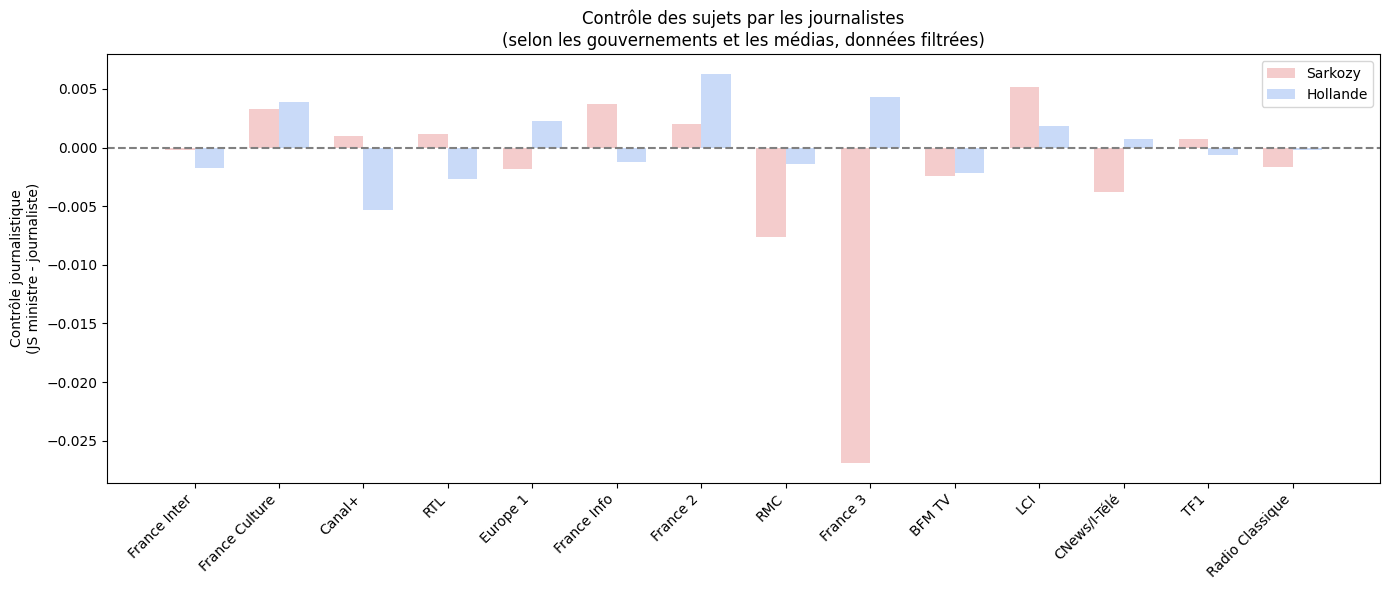

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# Étape 1 : Liste des colonnes de topics
topic_cols = [f'Topic_{i}' for i in range(1, 16)]

# Étape 2 : Vérification colonnes numériques
for col in topic_cols:
    df_lda_filtered2[col] = pd.to_numeric(df_lda_filtered2[col], errors='coerce')

# Étape 3 : Calcul des JS divergences par média et mandat
results = []
grouped = df_lda_filtered2.groupby(['Media_clean', 'Mandat'])

for (media, mandat), group in grouped:
    js_jm = []
    js_mj = []

    group = group.sort_values(by='link-href').reset_index(drop=True)
    
    for i in range(len(group) - 1):
        row_current = group.iloc[i]
        row_next = group.iloc[i + 1]

        if row_current['link-href'] != row_next['link-href']:
            continue
        if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
            continue

        current_vec = row_current[topic_cols].astype(float).values
        next_vec = row_next[topic_cols].astype(float).values

        if row_current['Qui_parle'] == 'Journaliste' and row_next['Qui_parle'] == 'Ministre':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_jm.append(js)
        elif row_current['Qui_parle'] == 'Ministre' and row_next['Qui_parle'] == 'Journaliste':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_mj.append(js)

    if js_jm and js_mj:
        results.append({
            'Media_clean': media,
            'Mandat': mandat,
            'JS_Journaliste_to_Ministre': np.mean(js_jm),
            'JS_Ministre_to_Journaliste': np.mean(js_mj)
        })

df_js_results_filtered = pd.DataFrame(results)

# Étape 4 : Calcul de la métrique de contrôle
df_js_results_filtered['Controle_Journaliste'] = (
    df_js_results_filtered['JS_Ministre_to_Journaliste'] - df_js_results_filtered['JS_Journaliste_to_Ministre']
)

# Étape 5 : Ajouter les scores médias depuis df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')
df_plot = df_js_results_filtered.merge(media_scores, on='Media_clean', how='left')

# Étape 6 : Trier les médias par score
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# Étape 7 : Réorganiser et filtrer les médias ayant les deux gouvernements
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'], how='any')

# Étape 8 : Création du graphique
x = np.arange(len(pivot))
width = 0.35

plt.figure(figsize=(14, 6))
bar1 = plt.bar(x - width/2, pivot['Sarkozy'], width, label='Sarkozy', color='#f4cccc')  # Rouge pastel
bar2 = plt.bar(x + width/2, pivot['Hollande'], width, label='Hollande', color='#c9daf8')  # Bleu pastel

plt.xticks(x, pivot.index, rotation=45, ha='right')
plt.ylabel('Contrôle journalistique\n(JS ministre - journaliste)')
plt.title('Contrôle des sujets par les journalistes\n(selon les gouvernements et les médias, données filtrées)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### Garder uniquement les 3 médias les plus à droites et les 3 médias les plus à gauche

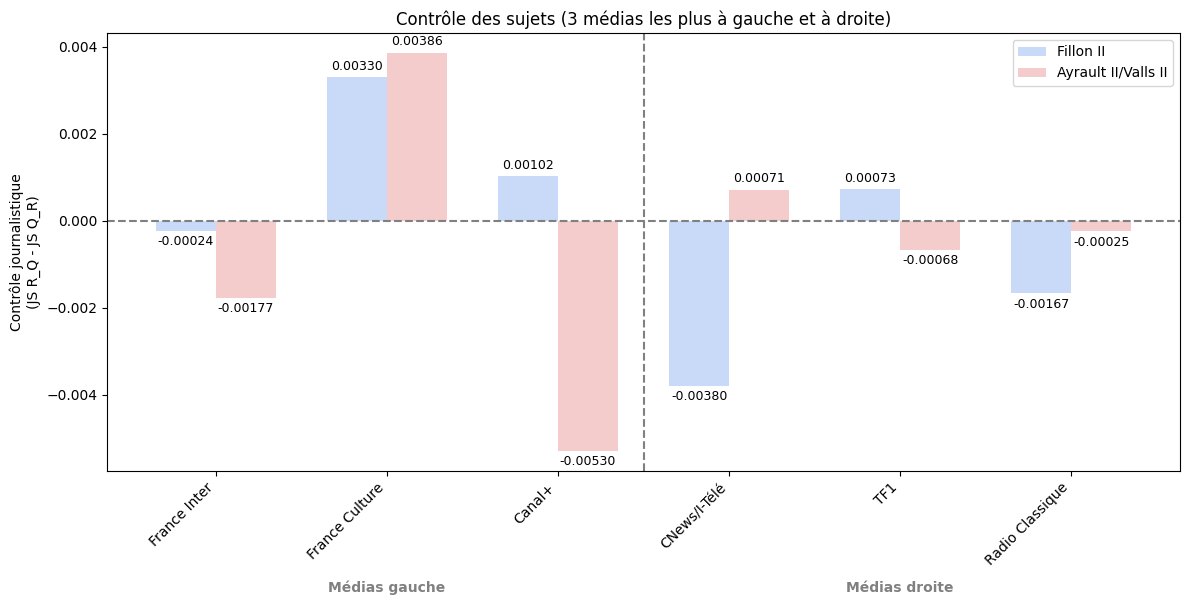

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# Étape 1 : Liste des colonnes de topics
topic_cols = [f'Topic_{i}' for i in range(1, 16)]

# Étape 2 : Assurez-vous que les colonnes sont bien numériques
for col in topic_cols:
    df_lda_filtered2[col] = pd.to_numeric(df_lda_filtered2[col], errors='coerce')

# Étape 3 : Calcul des JS divergences par média et mandat
results = []
grouped = df_lda_filtered2.groupby(['Media_clean', 'Mandat'])

for (media, mandat), group in grouped:
    js_jm = []
    js_mj = []

    group = group.sort_values(by='link-href').reset_index(drop=True)
    
    for i in range(len(group) - 1):
        row_current = group.iloc[i]
        row_next = group.iloc[i + 1]

        if row_current['link-href'] != row_next['link-href']:
            continue
        if row_current[topic_cols].isna().any() or row_next[topic_cols].isna().any():
            continue

        current_vec = row_current[topic_cols].astype(float).values
        next_vec = row_next[topic_cols].astype(float).values

        if row_current['Qui_parle'] == 'Journaliste' and row_next['Qui_parle'] == 'Ministre':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_jm.append(js)
        elif row_current['Qui_parle'] == 'Ministre' and row_next['Qui_parle'] == 'Journaliste':
            js = jensenshannon(current_vec, next_vec, base=2)
            js_mj.append(js)

    if js_jm and js_mj:
        results.append({
            'Media_clean': media,
            'Mandat': mandat,
            'JS_Journaliste_to_Ministre': np.mean(js_jm),
            'JS_Ministre_to_Journaliste': np.mean(js_mj)
        })

df_js_results_filtered = pd.DataFrame(results)

# Étape 4 : Calcul de la métrique de contrôle
df_js_results_filtered['Controle_Journaliste'] = (
    df_js_results_filtered['JS_Ministre_to_Journaliste'] - df_js_results_filtered['JS_Journaliste_to_Ministre']
)

# Étape 5 : Ajouter les scores médias depuis df_lda
media_scores = df_lda[['Media_clean', 'score_media']].drop_duplicates().set_index('Media_clean')
df_plot = df_js_results_filtered.merge(media_scores, on='Media_clean', how='left')

# Étape 6 : Trier les médias par score
ordered_media = df_plot[['Media_clean', 'score_media']].drop_duplicates().sort_values(by='score_media')
media_list = ordered_media['Media_clean'].tolist()

# Étape 7 : Réorganiser et filtrer les médias ayant les deux gouvernements
pivot = df_plot.pivot(index='Media_clean', columns='Mandat', values='Controle_Journaliste')
pivot = pivot.reindex(media_list)
pivot = pivot.dropna(subset=['Sarkozy', 'Hollande'], how='any')

# Étape 8 : Sélectionner les 3 médias les plus à gauche et 3 les plus à droite
pivot_subset = pd.concat([pivot.head(3), pivot.tail(3)])

# Étape 9 : Création du graphique
x = np.arange(len(pivot_subset))
width = 0.35

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, pivot_subset['Sarkozy'], width, label='Fillon II', color='#c9daf8')  
bar2 = plt.bar(x + width/2, pivot_subset['Hollande'], width, label='Ayrault II/Valls II', color='#f4cccc') 

plt.xticks(x, pivot_subset.index, rotation=45, ha='right')
plt.ylabel('Contrôle journalistique\n(JS R_Q - JS Q_R)')
plt.title('Contrôle des sujets (3 médias les plus à gauche et à droite)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

# Affichage des valeurs sur les barres avec 5 décimales
for bars in [bar1, bar2]:
    for rect in bars:
        height = rect.get_height()
        offset = 0.0001
        if height >= 0:
            plt.text(rect.get_x() + rect.get_width()/2, height + offset, f"{height:.5f}", 
                     ha='center', va='bottom', fontsize=9)
        else:
            plt.text(rect.get_x() + rect.get_width()/2, height - offset, f"{height:.5f}", 
                     ha='center', va='top', fontsize=9)

# Ajouter l'espace supplémentaire sous les labels
plt.subplots_adjust(bottom=0.25)

# Calculer la position verticale sous les labels (valeur négative pour descendre sous les ticks)
y_text = -0.25  # Ajuste cette valeur si besoin pour descendre plus ou moins bas

# Récupérer les indices des médias
index_france_culture = list(pivot_subset.index).index('France Culture')
index_tf1 = list(pivot_subset.index).index('TF1')

# Ajouter les labels sous les noms des médias
plt.text(index_france_culture, y_text, "Médias gauche", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='gray',
         transform=plt.gca().get_xaxis_transform())

plt.text(index_tf1, y_text, "Médias droite", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='gray',
         transform=plt.gca().get_xaxis_transform())


# Ajouter la ligne pointillée verticale pour séparer gauche/droite
plt.axvline(2.5, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


### Résultat théorique attendu

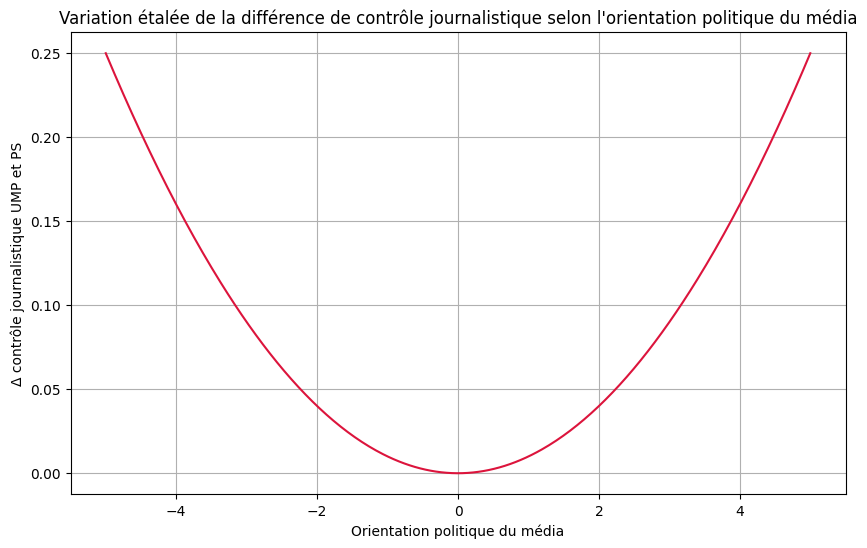

In [186]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 400)
a = 10  # facteur d'étalement
y = (x / a)**2

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='crimson')
plt.xlabel("Orientation politique du média")
plt.ylabel("Δ contrôle journalistique UMP et PS")
plt.title("Variation étalée de la différence de contrôle journalistique selon l'orientation politique du média")
plt.grid(True)

plt.show()
